In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions

from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [4]:
data = pd.read_csv("/Users/weilu/Research/data/survey_center_of_mass_distance_complete.csv", index_col=0)

In [5]:
y = "r_com_com"
d = data

t = d.groupby(["ResName1", "ResName2"])[y].idxmin().reset_index()
selected = d.iloc[t[y].to_list()].reset_index(drop=True)

In [26]:
weight_list = ["ALA", "SER", "PRO", "VAL", "THR", "CYS", "ILE", "LEU", "ASN", "ASP", "GLN", "LYS", "GLU", "MET", "HIS", "PHE", "ARG", "TYR", "TRP"]
res_to_index = {}
for i, res in enumerate(weight_list):
    res_to_index[res] = i

min_r_com_com_matrix = np.zeros((19, 19))
for i, line in selected.iterrows():
    res1 = line["ResName1"]
    res2 = line["ResName2"]
    min_r_com_com_matrix[res_to_index[res1]][res_to_index[res2]] = line["r_com_com"] - 3.5 + 0.3
    
plt.imshow(min_r_com_com_matrix, origin=0, cmap="seismic", vmin=-2, vmax=2)
plt.colorbar()
plt.xticks(ticks=np.arange(19), labels=weight_list)

([<matplotlib.axis.XTick at 0x1a27095940>,
 <a list of 19 Text xticklabel objects>)

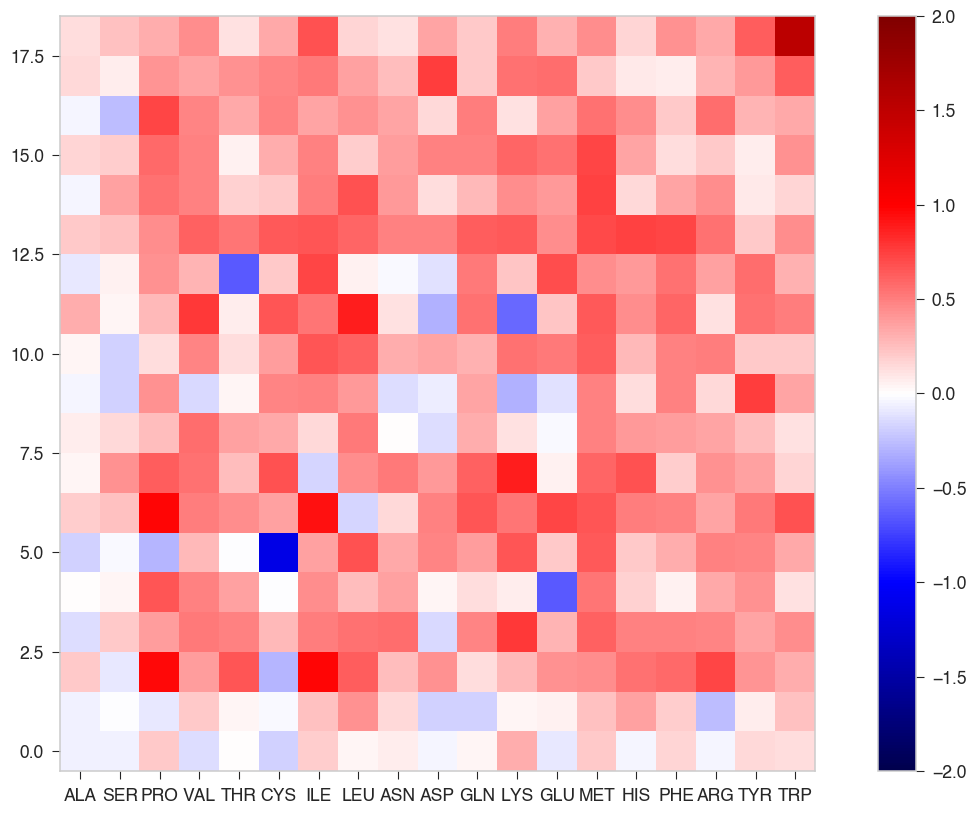

In [6]:
selected

,Protein,id1,ResName1,id2,ResName2,r_ca_ca,r_com_com,r_cb_cb,r_ca_com,r_com_ca
0,1cqzB02,22,ALA,95,ALA,5.908709,3.138504,3.138505,4.545833,4.482826
1,1ev7B02,299,ALA,276,ARG,5.682232,3.165103,4.353362,4.676932,4.942834
2,1rrsA01,185,ALA,182,ASN,5.601128,3.270920,4.290506,4.184345,5.161467
3,2efwG00,95,ALA,92,ASP,5.505649,3.154983,4.075313,4.186296,4.884866
4,1c07A00,77,ALA,61,CYS,4.441674,3.015272,2.951008,3.794416,4.444079
5,2ib1A00,182,ALA,146,GLN,5.747602,3.246770,3.775722,4.106207,4.257691
6,3geuA00,164,ALA,167,GLU,5.388519,3.120584,3.915556,4.358684,4.813024
7,1qrjA01,120,ALA,71,HIS,5.473842,3.163042,4.608379,4.049760,4.580517
8,4ne3A00,86,ALA,96,ILE,6.374214,3.398528,3.494172,4.808078,4.939825
9,1irzA00,21,ALA,38,LEU,6.210785,3.239366,3.551487,4.081262,5.013743


In [19]:
res_list = ['ARG', 'ASP', 'PRO', 'TRP', 'THR', 'HIS', 'GLU', 'LEU', 'SER',
       'LYS', 'VAL', 'PHE', 'ILE', 'TYR', 'GLN', 'ALA', 'ASN', 'MET',
       'CYS']

In [ ]:
for res1 in res_list:
    for res2 in res_list:
        data.query(f"ResName1 == '{res1}' and ResName2 == '{res2}'").hist("r_com_com", bins=50)
        plt.xlim([0,20])
        plt.title(f"{res1}_{res2}")
        plt.savefig(f"/Users/weilu/Research/database/survey_center_of_mass_distance/{res1}_{res2}.png", dpi=300)
        plt.clf()

In [63]:
data["r_com_com"].min()

2.062640965053271

2.062640965053271

In [249]:
short_list = ['ARG', 'ASP', 'PRO', 'TRP', 'THR', 'HIS', 'GLU', 'LEU', 'SER',
       'LYS', 'VAL', 'PHE', 'ILE', 'TYR', 'GLN', 'ALA', 'ASN', 'MET',
       'CYS']

from sklearn.mixture import GaussianMixture

df_ = []
for res1 in short_list:
    for res2 in short_list:
        data_one = data.query(f"ResName1 == '{res1}' and ResName2 == '{res2}'").reset_index(drop=True)
        lower_data = data_one[data_one.r_com_com <= 7.5].reset_index(drop=True)
        data_res = lower_data
        X = data_res[["r_com_com"]].values
        gmm = GaussianMixture(n_components=3).fit(X)
        plt.hist(X, bins=20)
        # x_hat = np.array(bin_centers).reshape(-1, 1)
        x_min = data_res["r_com_com"].min()
        x_max = data_res["r_com_com"].max()
        x_hat = np.linspace(x_min, x_max).reshape(-1, 1)
        y_hat = len(X)/6*np.exp(gmm.score_samples(x_hat))
        # e_hat = gmm.score_samples(x_hat)
        plt.plot(x_hat, y_hat)
        #short_list = ['ARG','ASP']
#         df_temp = pd.DataFrame(np.array([bin_centers, y]).T, columns=["r_cbd_cbd","energy"])
#         df_temp["ResName1"] = res1
#         df_temp["ResName2"] = res2
#         #print(df_temp)
#         df_.append(df_temp)
#         plt.plot(bin_centers, y)
        plt.title(f"gmm_fit_{res1}_{res2}")
        plt.savefig(f"/Users/weilu/Research/server/mar_2020/cmd_cmd_exclude_volume/figures/gmm_fit_{res1}_{res2}.png", dpi=300)
        plt.clf()
# print(df)
# df = pd.concat(df_).reset_index(drop=True)
# df.to_csv('/Users/weilu/Research/server/mar_2020/cmd_cmd_exclude_volume/cbd_cbd_energy.csv', index=False)

<Figure size 1618.03x1000 with 0 Axes>

In [157]:
short_list = ['ARG', 'ASP', 'PRO', 'TRP', 'THR', 'HIS', 'GLU', 'LEU', 'SER',
       'LYS', 'VAL', 'PHE', 'ILE', 'TYR', 'GLN', 'ALA', 'ASN', 'MET',
       'CYS']


#short_list = ['ARG','ASP']
df_ = []
for res1 in short_list:
    for res2 in short_list:
        data_one = data.query(f"ResName1 == '{res1}' and ResName2 == '{res2}'").reset_index(drop=True)
        lower_data = data_one[data_one.r_com_com <= 7.5].reset_index(drop=True)
        hist,bins = np.histogram(lower_data["r_com_com"], bins=10)
        bin_centers = (bins[1:] + bins[:-1])/2
        y = -np.log((hist+10)/np.sum(hist+10))
        df_temp = pd.DataFrame(np.array([bin_centers, y]).T, columns=["r_cbd_cbd","energy"])
        df_temp["ResName1"] = res1
        df_temp["ResName2"] = res2
        #print(df_temp)
        df_.append(df_temp)
        plt.plot(bin_centers, y)
        plt.title(f"energy_{res1}_{res2}")
        plt.savefig(f"/Users/weilu/Research/server/mar_2020/cmd_cmd_exclude_volume/figures/energy_{res1}_{res2}.png", dpi=300)
        plt.clf()
# print(df)
df = pd.concat(df_).reset_index(drop=True)
df.to_csv('/Users/weilu/Research/server/mar_2020/cmd_cmd_exclude_volume/cbd_cbd_energy.csv', index=False)

<Figure size 1618.03x1000 with 0 Axes>

In [147]:
df_temp = pd.DataFrame(np.array([bin_centers, y]).T, columns=["r_cbd_cbd","energy"])
df_temp["ResName1"] = res1
df_temp["ResName2"] = res2

In [194]:
[10, 20]*2

[10, 20, 10, 20]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a539c44a8>]],
      dtype=object)

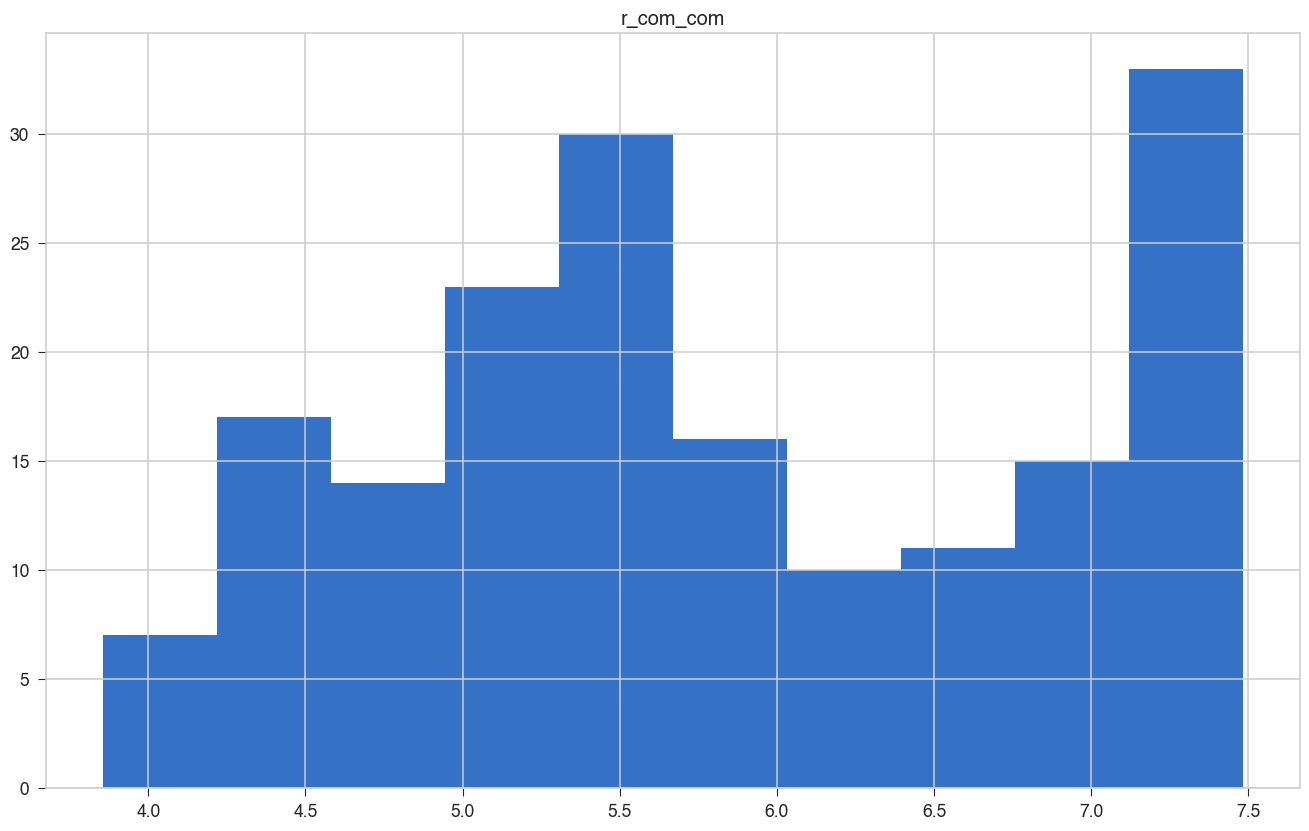

In [201]:
lower_data.hist("r_com_com")

In [270]:
data.query("3c18A03")

,Protein,id1,ResName1,id2,ResName2,r_ca_ca,r_com_com,r_cb_cb,r_ca_com,r_com_ca
0,3c18A03,233,ARG,285,TYR,11.549665,12.578935,11.438617,14.603118,10.346378
1,3c18A03,233,ARG,238,THR,12.113347,8.895204,11.572654,12.652252,8.730217
2,3c18A03,233,ARG,234,ASP,3.733604,9.481483,5.515192,5.804656,7.033244
3,3c18A03,233,ARG,245,GLU,11.869354,6.874781,9.813950,9.490125,8.704953
4,3c18A03,233,ARG,241,GLU,11.584703,5.853921,9.063191,10.052837,7.410306
5,3c18A03,233,ARG,237,TRP,8.558047,3.946257,7.460506,6.392295,5.876545
6,3c18A03,233,ARG,286,GLU,9.464896,9.889798,9.457272,8.719884,9.756637
7,3c18A03,233,ARG,235,ARG,5.714665,4.654038,5.757178,5.374342,6.539949
8,3c18A03,233,ARG,236,PRO,7.766732,8.435995,8.679585,8.943483,6.935363
9,3c18A03,233,ARG,242,LEU,11.528663,8.488094,10.936115,11.071333,8.223381


In [254]:
a = gmm.sample(1000)[0]

In [259]:
min(X)[0]

2.062640965053271

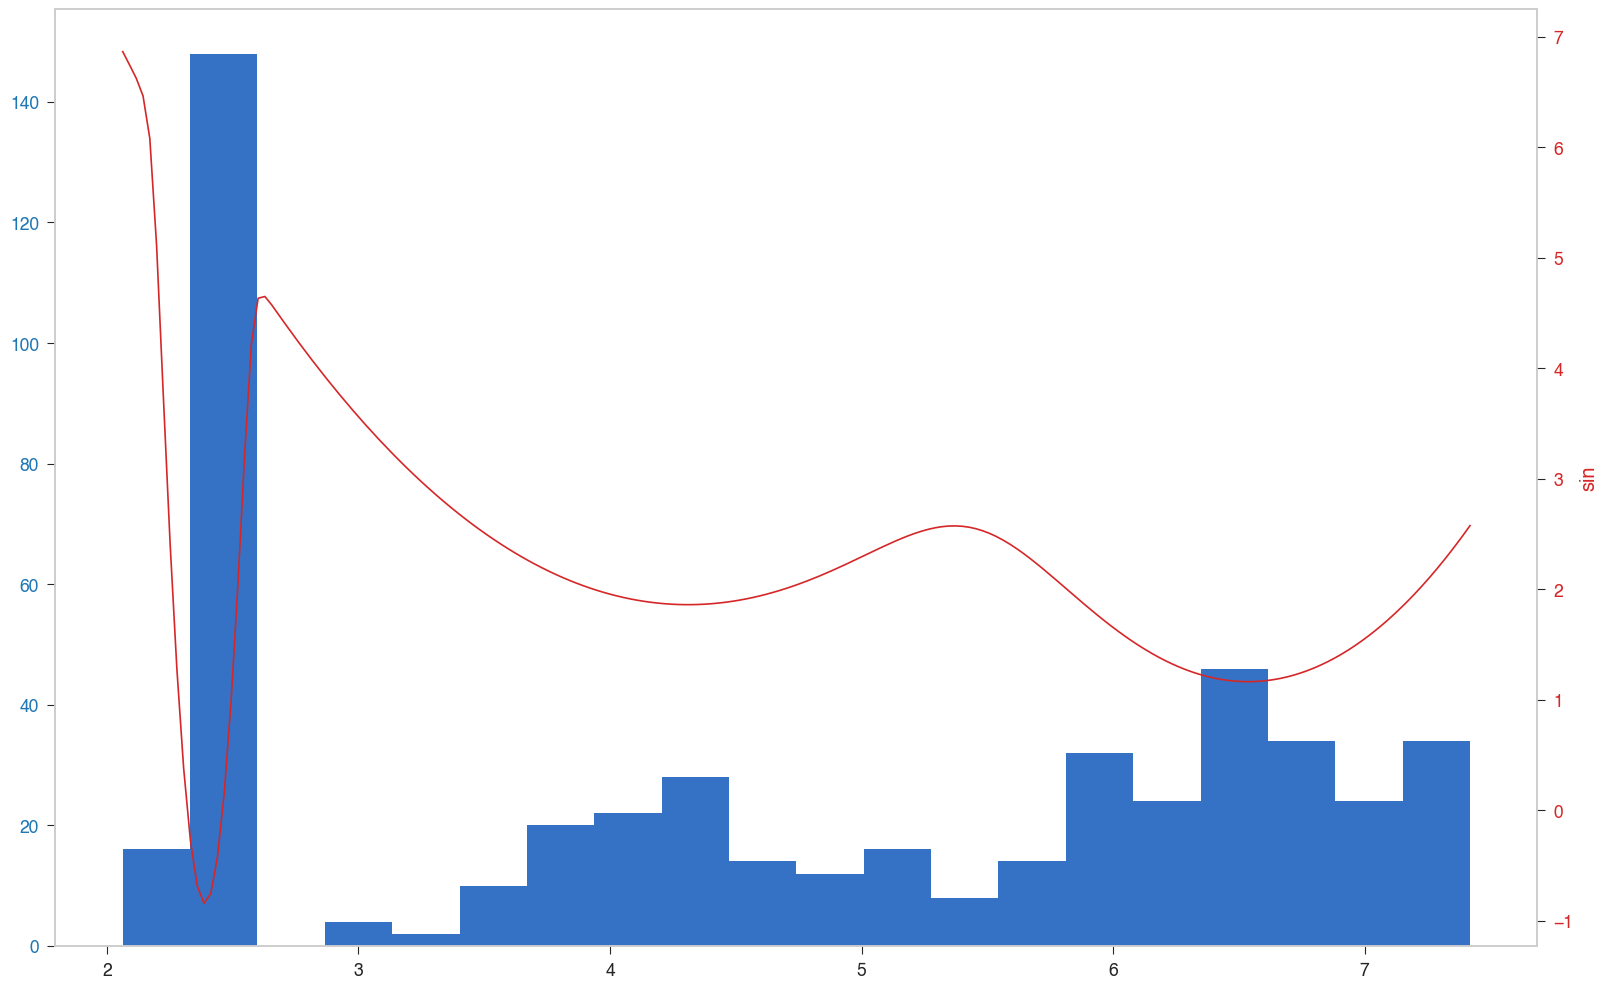

In [268]:
fig, ax1 = plt.subplots()

from sklearn.mixture import GaussianMixture
data_res = lower_data
X = data_res[["r_com_com"]].values
gmm = GaussianMixture(n_components=3).fit(X)

x_hat = np.linspace(min(X)[0], max(X)[0], 200).reshape(-1, 1)
y_hat = len(X)/6*np.exp(gmm.score_samples(x_hat))
e_hat = -gmm.score_samples(x_hat)
color = 'tab:blue'
ax1.tick_params(axis='y', labelcolor=color)
ax1.hist(X, bins=20)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(x_hat, e_hat, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

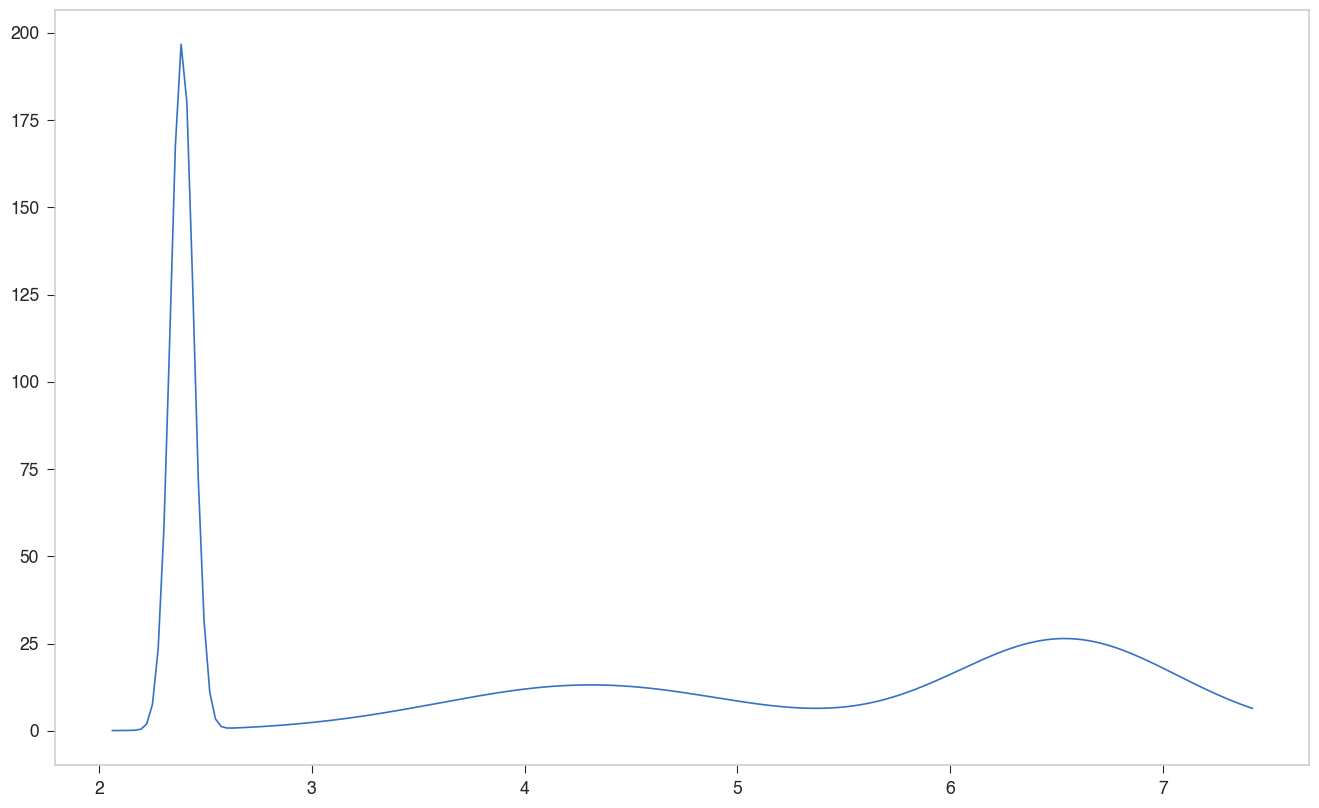

In [269]:
plt.plot(x_hat, y_hat)


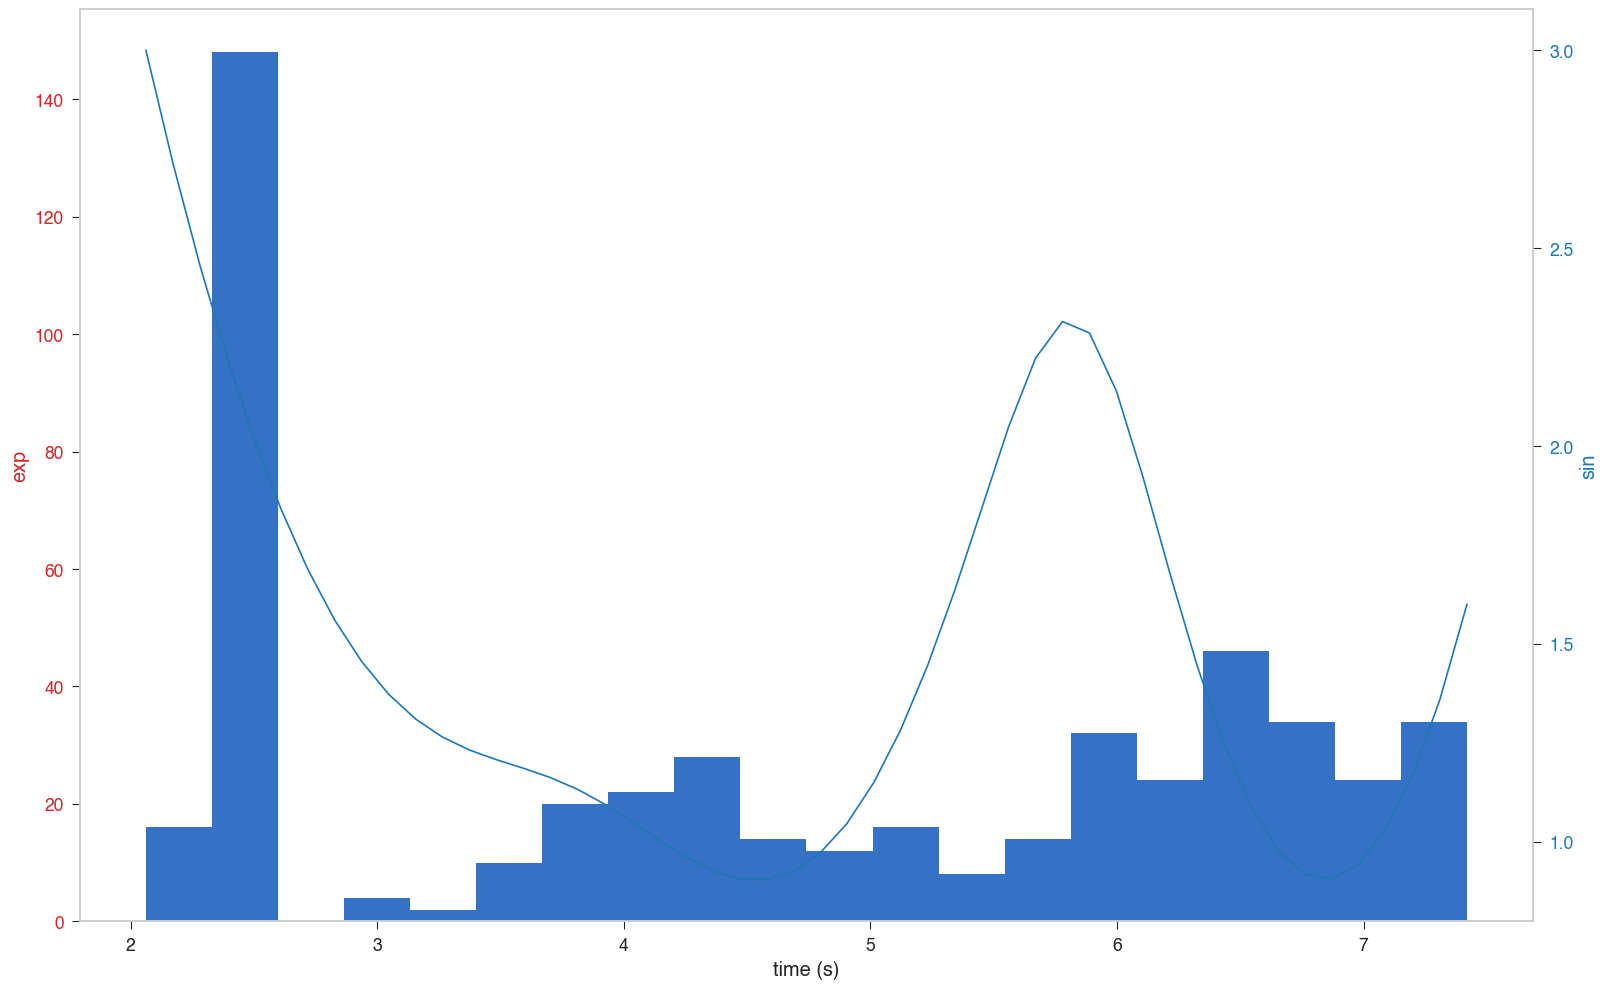

In [251]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)

ax1.tick_params(axis='y', labelcolor=color)
ax1.hist(X, bins=20)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(x_hat, -e_hat, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

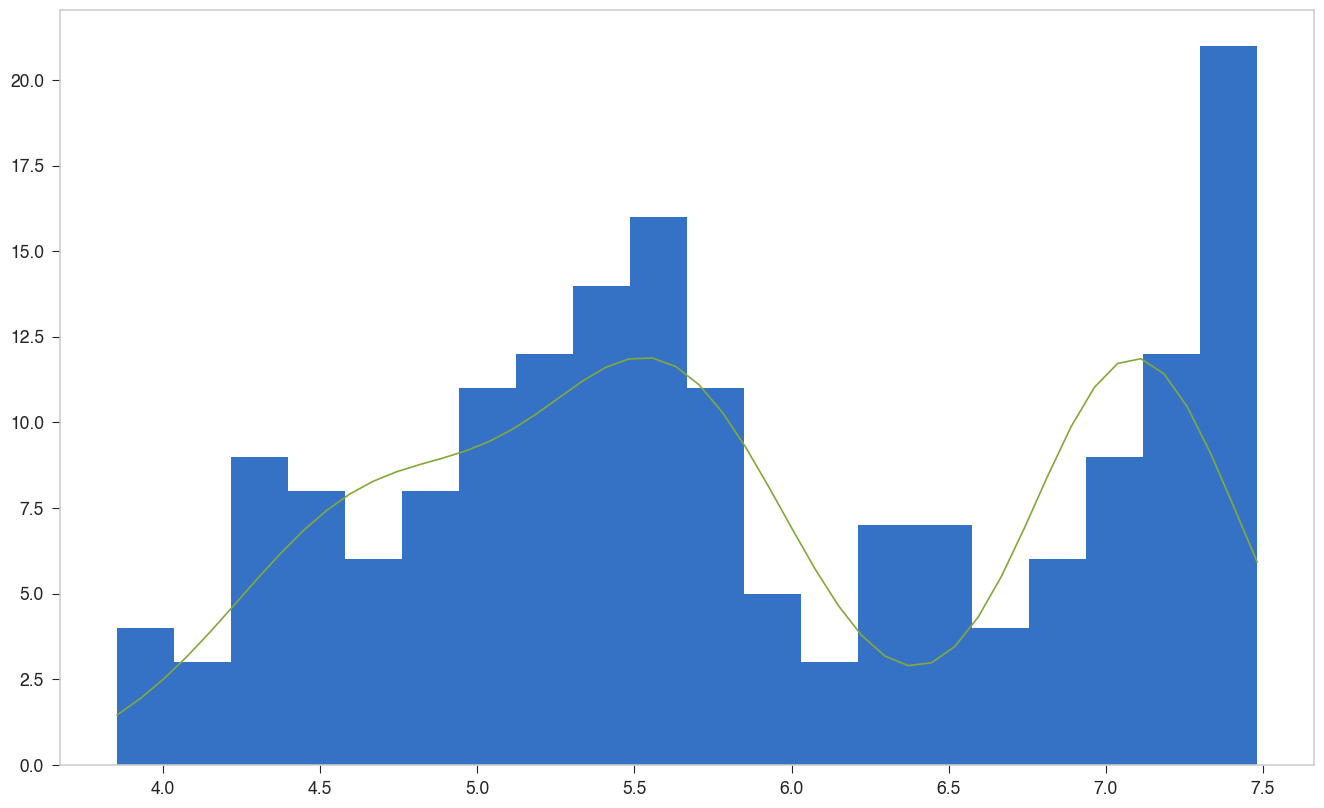

In [243]:
plt.hist(X, bins=20)
# x_hat = np.array(bin_centers).reshape(-1, 1)
x_hat = np.linspace(bins[0], bins[-1]).reshape(-1, 1)
y_hat = len(X)/6*np.exp(gmm.score_samples(x_hat))
# e_hat = gmm.score_samples(x_hat)
plt.plot(x_hat, y_hat)
# plt.plot(x_hat, e_hat)

(array([ 15.,  49., 116., 138., 160., 137.,  58., 123., 162.,  42.]),
 array([3.40783336, 3.8572258 , 4.30661824, 4.75601069, 5.20540313,
        5.65479557, 6.10418802, 6.55358046, 7.0029729 , 7.45236535,
        7.90175779]),
 <a list of 10 Patch objects>)

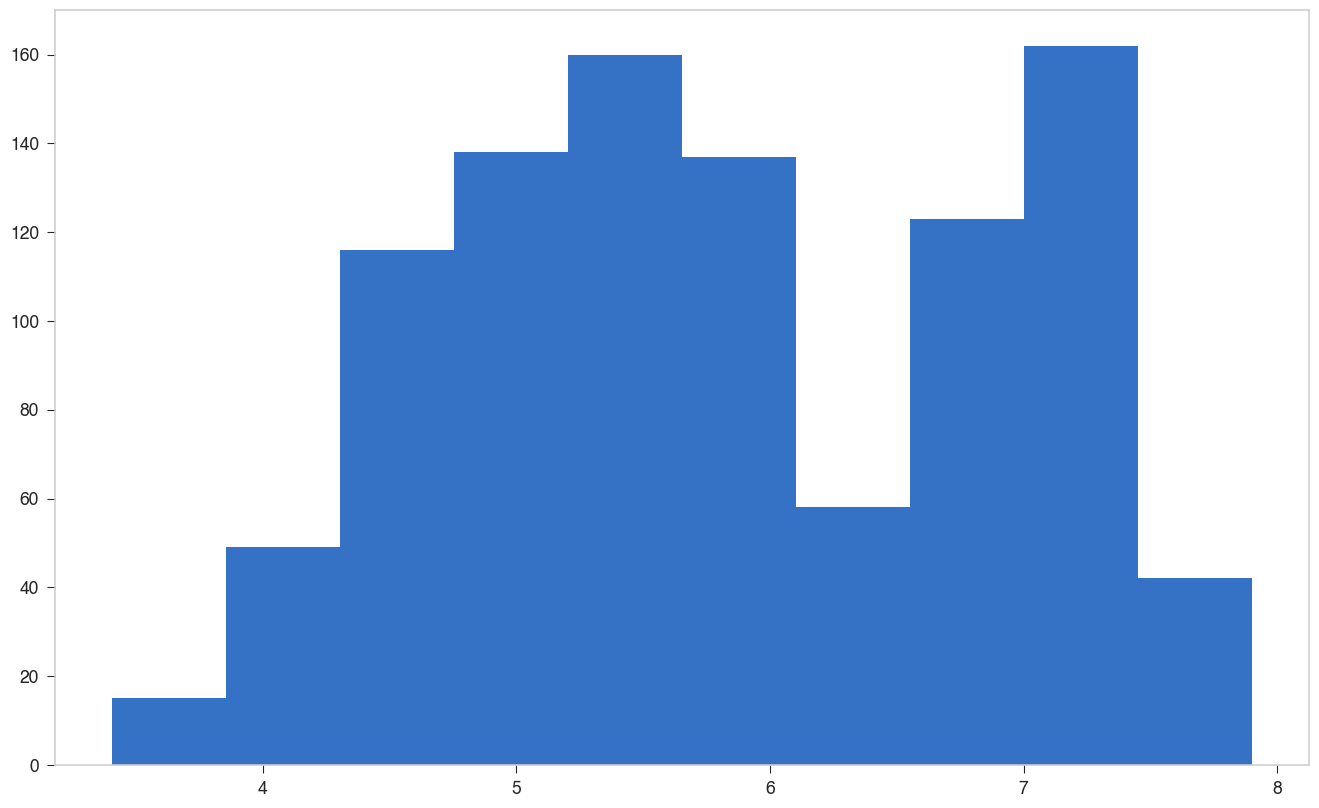

In [224]:
plt.hist(list(gmm.sample(1000)[0].flatten()))

In [226]:
gmm.score_samples(np.array(bin_centers).reshape(-1, 1))

array([-2.3501565 , -1.5211332 , -1.22514241, -1.08947293, -0.90516632,
       -1.14392634, -2.01902036, -1.97690737, -1.01154463, -1.102287  ])

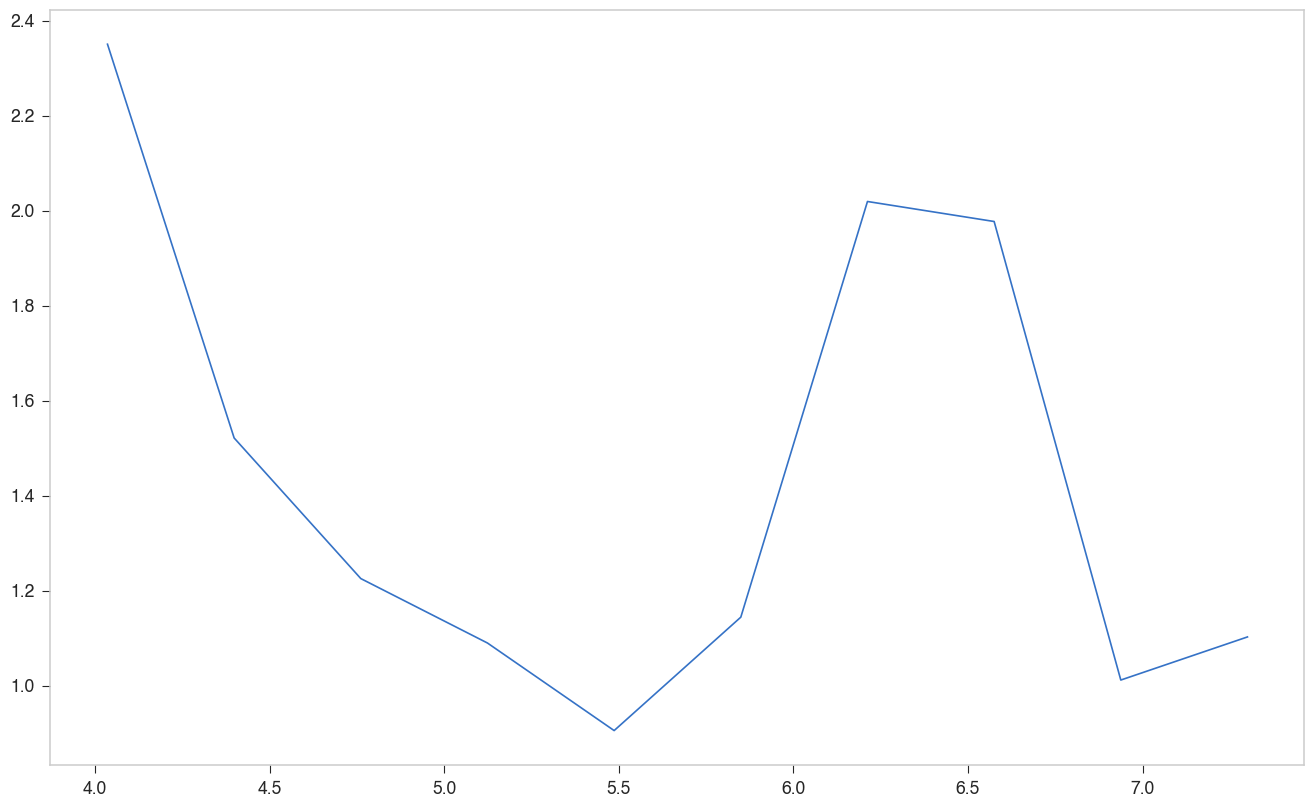

In [228]:
y_hat = -gmm.score_samples(np.array(bin_centers).reshape(-1, 1))
plt.plot(bin_centers, y_hat)

Text(0.5, 1.0, 'energy_CYS_MET')

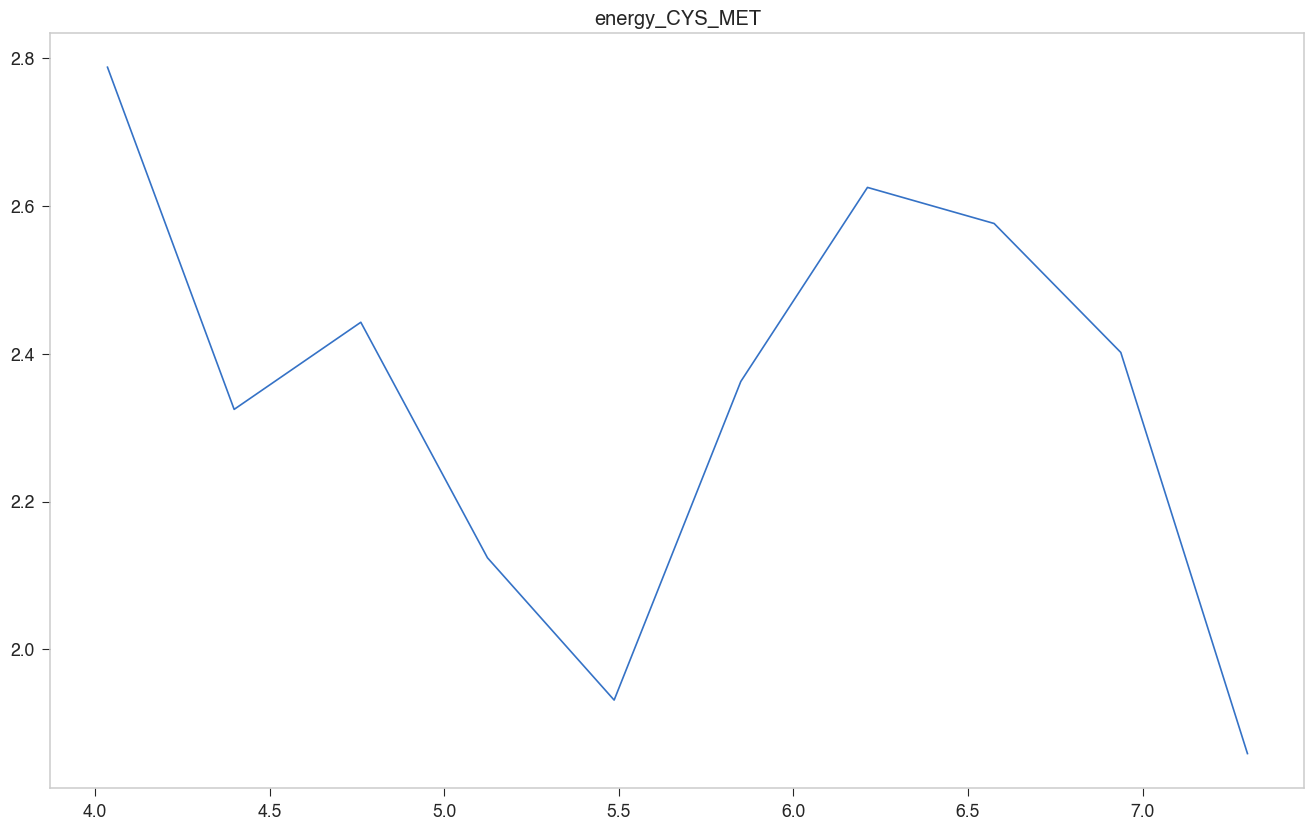

In [200]:
from scipy.signal import savgol_filter
res1 = "CYS"
res2 = "MET"
data_one = data.query(f"ResName1 == '{res1}' and ResName2 == '{res2}'").reset_index(drop=True)
lower_data = data_one[data_one.r_com_com <= 7.5].reset_index(drop=True)
n_bins = 10 * 1
data_selected = lower_data["r_com_com"].to_list()
hist,bins = np.histogram(data_selected, bins=n_bins)
bin_centers = (bins[1:] + bins[:-1])/2
y = -np.log((hist+10)/np.sum(hist+10))
# yhat = savgol_filter(y, 21, 3) # window size 51, polynomial order 3
df_temp = pd.DataFrame(np.array([bin_centers, y]).T, columns=["r_cbd_cbd","energy"])
df_temp["ResName1"] = res1
df_temp["ResName2"] = res2
plt.plot(bin_centers, y)
# plt.plot(bin_centers, yhat)
plt.title(f"energy_{res1}_{res2}")

In [ ]:
scatter()

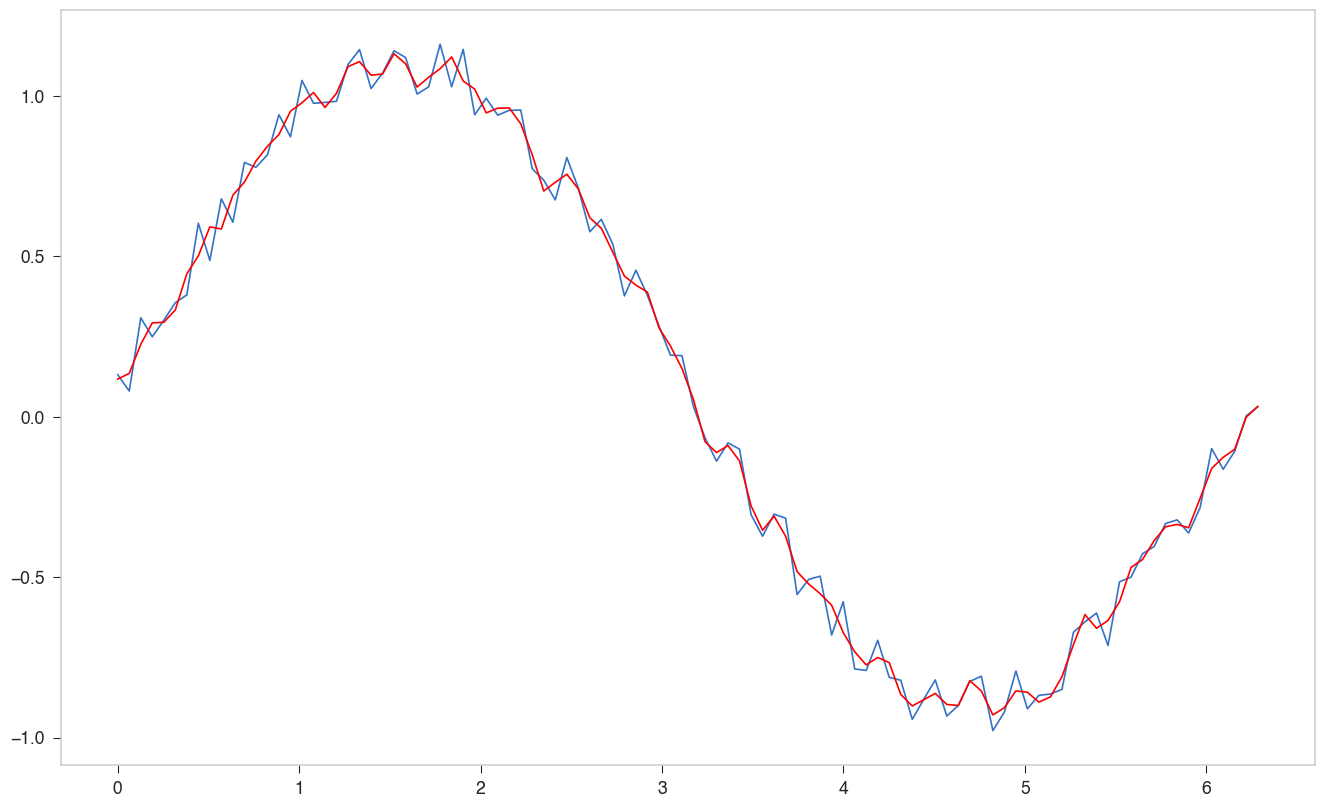

In [174]:
from scipy.signal import savgol_filter
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
yhat = savgol_filter(y, 5, 3) # window size 51, polynomial order 3

plt.plot(x,y)
plt.plot(x,yhat, color='red')
plt.show()

In [106]:
df = pd.DataFrame(columns=["ResName1","ResName2","Max","Lowest"])


short_list = ['ARG', 'ASP', 'PRO', 'TRP', 'THR', 'HIS', 'GLU', 'LEU', 'SER',
       'LYS', 'VAL', 'PHE', 'ILE', 'TYR', 'GLN', 'ALA', 'ASN', 'MET',
       'CYS']


#short_list = ['ARG','ASP']

for res1 in short_list:
    for res2 in short_list:
        data_one = data.query(f"ResName1 == '{res1}' and ResName2 == '{res2}'").reset_index(drop=True)
        lower_data = data_one[data_one.r_com_com <= 7.5].reset_index(drop=True)
        hist,bins = np.histogram(lower_data["r_com_com"], bins=10)
        max_index = list(hist).index(max(hist))
        max_value = (bins[max_index + 1] + bins[max_index]) / 2
        lowest_value = bins[0]
        min_value = lower_data["r_com_com"].min()
        max_hist = max(hist)
        #print(lowest_value)
        #print(max_value)
        df_temp = pd.DataFrame([(res1,res2,max_value,lowest_value, min_value, max_hist)], columns=["ResName1","ResName2","Max","Lowest", "Min", "max_hist"])
        #print(df_temp)
        df = df.append(df_temp, ignore_index=True) # append return a new dataframe, so must use df = df.append()
        #
# print(df)
df.to_csv('/Users/weilu/Research/server/mar_2020/cmd_cmd_exclude_volume/cbd_cbd_max_min_bins10.csv', index=False)

/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [64]:
df = pd.DataFrame(columns=["ResName1","ResName2","Max","Lowest"])


short_list = ['ARG', 'ASP', 'PRO', 'TRP', 'THR', 'HIS', 'GLU', 'LEU', 'SER',
       'LYS', 'VAL', 'PHE', 'ILE', 'TYR', 'GLN', 'ALA', 'ASN', 'MET',
       'CYS']


#short_list = ['ARG','ASP']

for res1 in short_list:
    for res2 in short_list:
        data_one = data.query(f"ResName1 == '{res1}' and ResName2 == '{res2}'")
        lower_data = data_one[data_one.r_com_com <= 7.5].reset_index(drop=True)
        hist,bins = np.histogram(lower_data["r_com_com"], bins=30)
        max_index = list(hist).index(max(hist))
        max_value = (bins[max_index + 1] + bins[max_index]) / 2
        lowest_value = bins[0]
        min_value = lower_data["r_com_com"].min()
        #print(lowest_value)
        #print(max_value)
        df_temp = pd.DataFrame([(res1,res2,max_value,lowest_value, min_value)], columns=["ResName1","ResName2","Max","Lowest", "Min"])
        #print(df_temp)
        df = df.append(df_temp, ignore_index=True) # append return a new dataframe, so must use df = df.append()
        #
        #print(bins[max_index])
        plt.hist(lower_data["r_com_com"],bins=bins)
        plt.axvline(max_value, color='black')
        plt.axvline(lowest_value, color='red')
        #sns.distplot(lower_data["r_com_com"],bins=30)
        plt.savefig(f"/Users/weilu/Research/server/mar_2020/cmd_cmd_exclude_volume/figures/{res1}_{res2}.png", dpi=300)
        plt.clf()
print(df)
df.to_csv('/Users/weilu/Research/server/mar_2020/cmd_cmd_exclude_volume/cbd_cbd_max_min.csv', index=False)

/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




       Lowest       Max       Min ResName1 ResName2
0    3.770143  7.311417  3.770143      ARG      ARG
1    3.348837  5.493157  3.348837      ARG      ASP
2    3.921745  7.197585  3.921745      ARG      PRO
3    3.540129  7.163957  3.540129      ARG      TRP
4    3.529463  7.431207  3.529463      ARG      THR
5    3.643981  7.425067  3.643981      ARG      HIS
6    3.564350  4.546942  3.564350      ARG      GLU
7    3.629136  7.434434  3.629136      ARG      LEU
8    2.941009  7.116918  2.941009      ARG      SER
9    3.310505  7.427975  3.310505      ARG      LYS
10   3.673704  7.308532  3.673704      ARG      VAL
11   3.405437  7.430602  3.405437      ARG      PHE
12   3.558249  7.434250  3.558249      ARG      ILE
13   3.493992  5.962074  3.493992      ARG      TYR
14   3.700493  7.308298  3.700493      ARG      GLN
15   3.165103  6.848204  3.165103      ARG      ALA
16   3.546138  7.298869  3.546138      ARG      ASN
17   3.748634  6.558111  3.748634      ARG      MET
18   3.69929

<Figure size 1618.03x1000 with 0 Axes>

In [66]:
df["diff"] = df["Lowest"] - df["Min"]

In [74]:
lower_data["r_com_com"].min()

2.062640965053271

In [93]:
df_bin30 = pd.read_csv("/Users/weilu/Research/server/mar_2020/cmd_cmd_exclude_volume/cbd_cbd_max_min.csv")

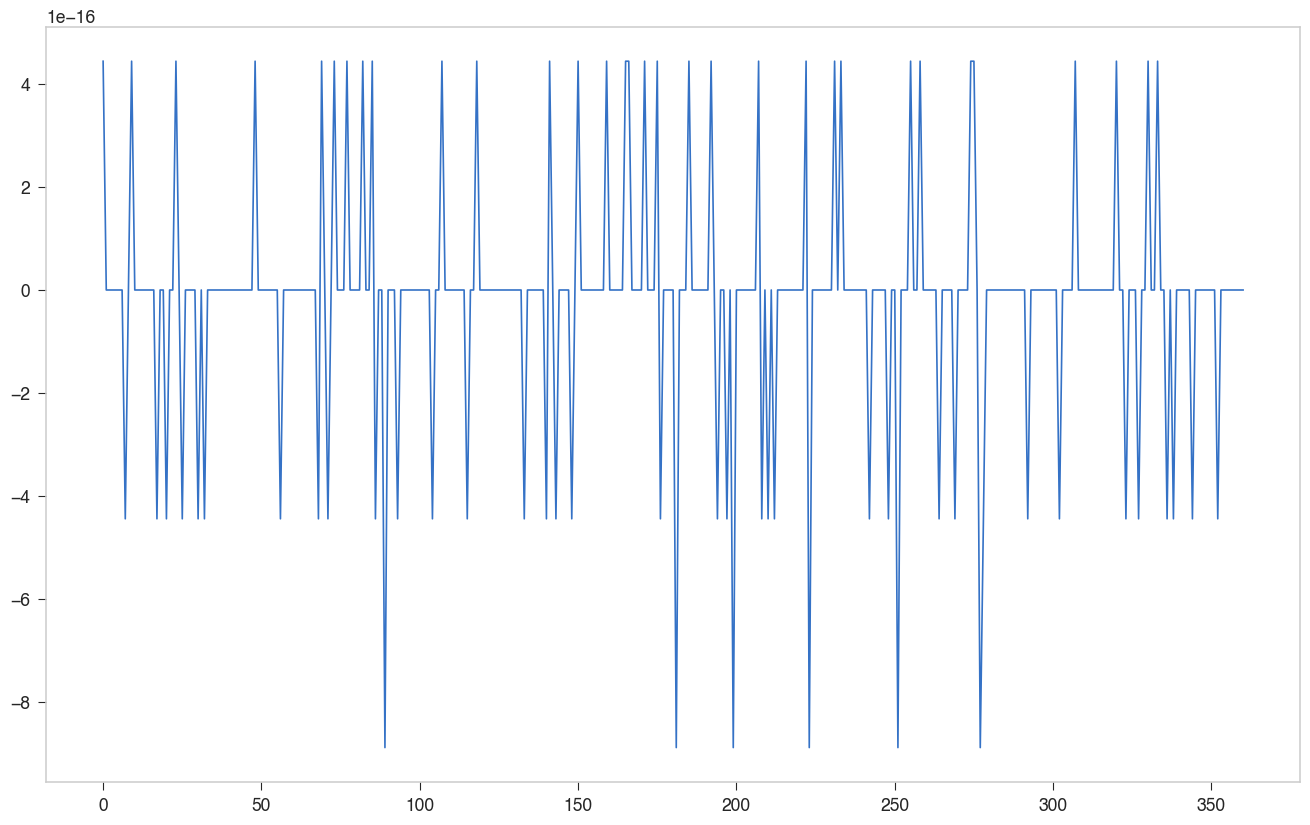

In [96]:
plt.plot(df_bin30["Lowest"]-df["Lowest"])

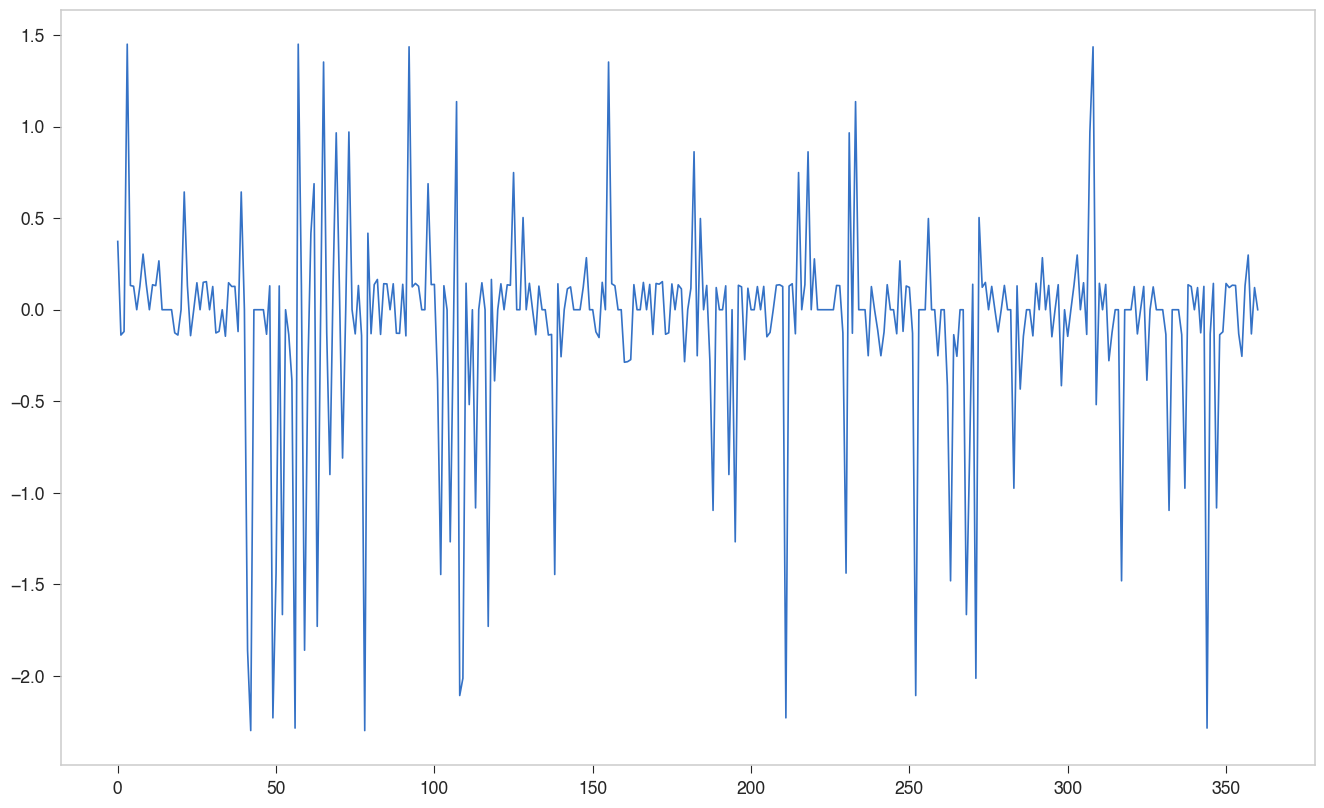

In [107]:
plt.plot(df_bin30["Max"]-df["Max"])

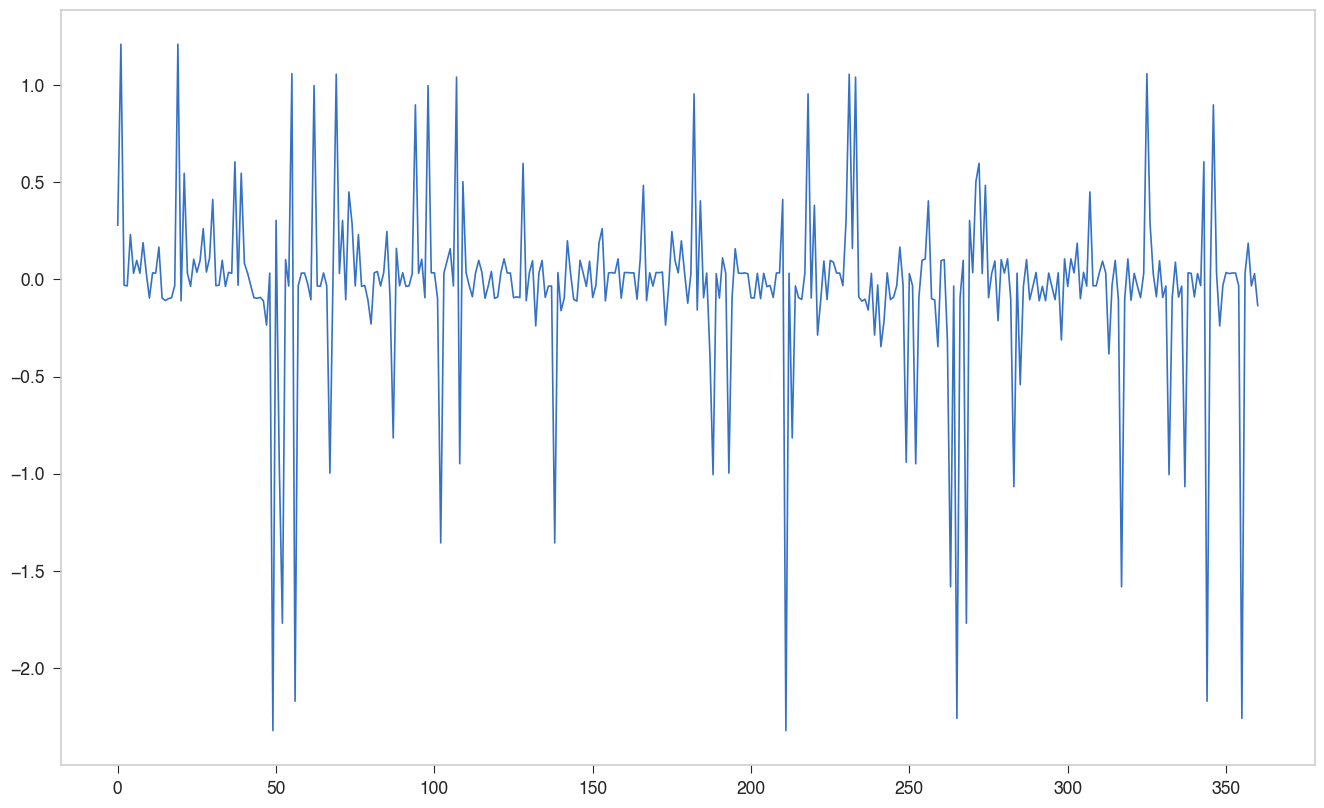

In [97]:
plt.plot(df_bin30["Max"]-df["Max"])

([<matplotlib.axis.XTick at 0x1a345bcc18>,
 <a list of 19 Text xticklabel objects>)

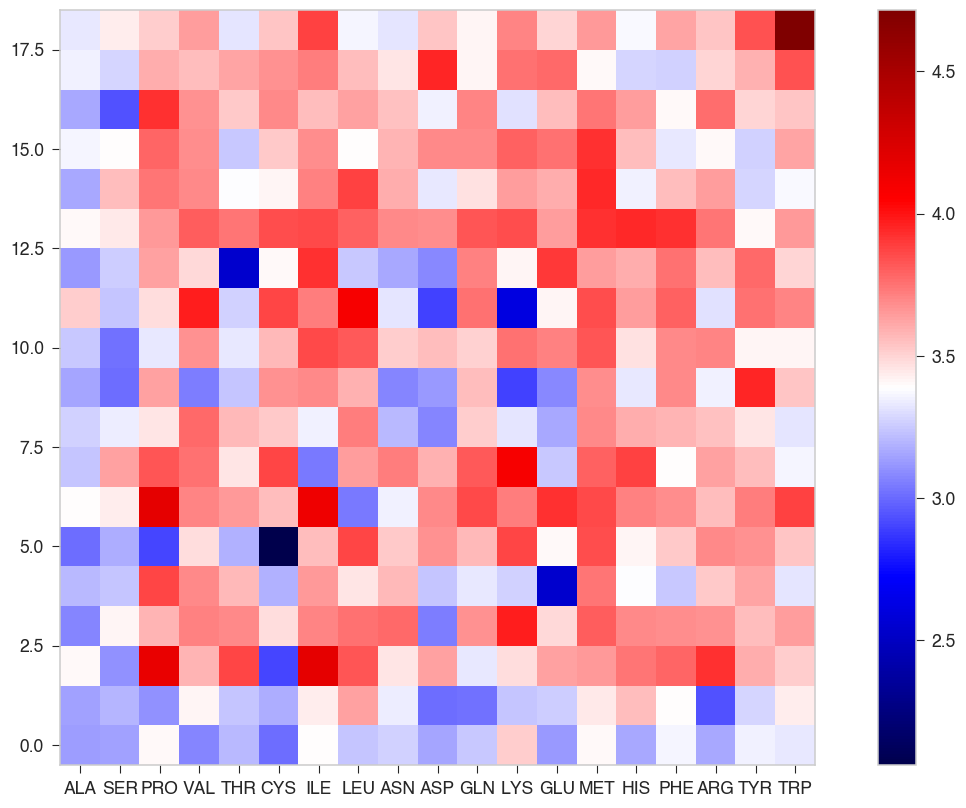

In [77]:
weight_list = ["ALA", "SER", "PRO", "VAL", "THR", "CYS", "ILE", "LEU", "ASN", "ASP", "GLN", "LYS", "GLU", "MET", "HIS", "PHE", "ARG", "TYR", "TRP"]
res_to_index = {}
for i, res in enumerate(weight_list):
    res_to_index[res] = i

min_r_com_com_matrix = np.zeros((19, 19))
for i, line in df.iterrows():
    res1 = line["ResName1"]
    res2 = line["ResName2"]
    min_r_com_com_matrix[res_to_index[res1]][res_to_index[res2]] = line["Min"]
    
# plt.imshow(min_r_com_com_matrix, origin=0, cmap="seismic", vmin=-2, vmax=2)
plt.imshow(min_r_com_com_matrix, origin=0, cmap="seismic")
plt.colorbar()
plt.xticks(ticks=np.arange(19), labels=weight_list)

([<matplotlib.axis.XTick at 0x1a3483d240>,
 <a list of 19 Text xticklabel objects>)

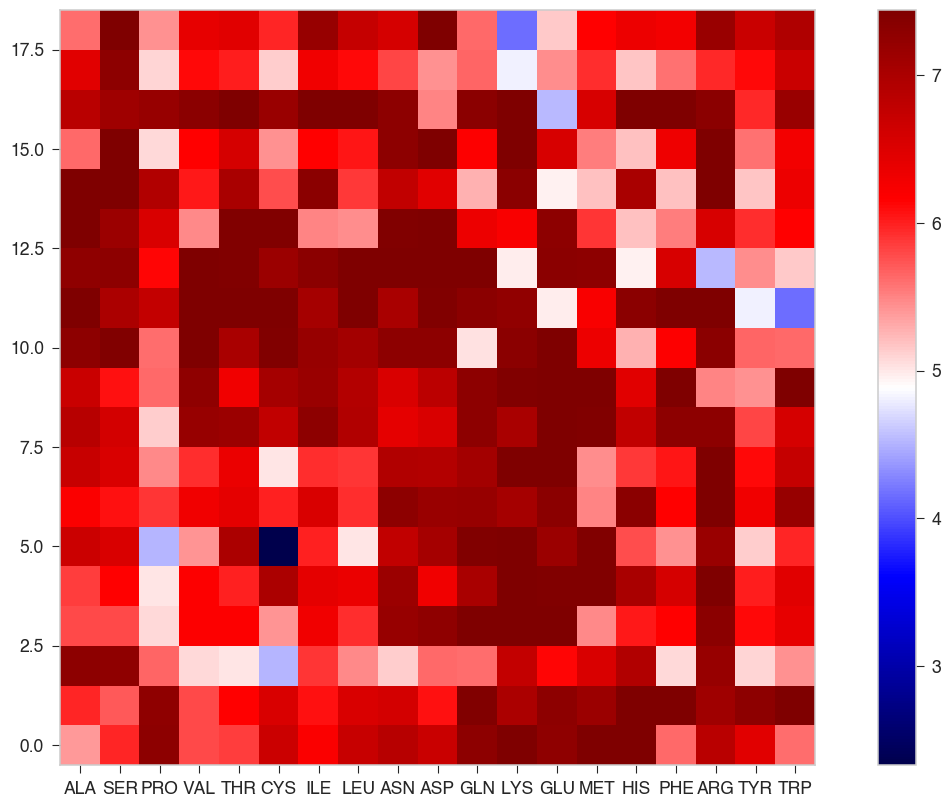

In [78]:
weight_list = ["ALA", "SER", "PRO", "VAL", "THR", "CYS", "ILE", "LEU", "ASN", "ASP", "GLN", "LYS", "GLU", "MET", "HIS", "PHE", "ARG", "TYR", "TRP"]
res_to_index = {}
for i, res in enumerate(weight_list):
    res_to_index[res] = i

min_r_com_com_matrix = np.zeros((19, 19))
for i, line in df.iterrows():
    res1 = line["ResName1"]
    res2 = line["ResName2"]
    min_r_com_com_matrix[res_to_index[res1]][res_to_index[res2]] = line["Max"]
    
# plt.imshow(min_r_com_com_matrix, origin=0, cmap="seismic", vmin=-2, vmax=2)
plt.imshow(min_r_com_com_matrix, origin=0, cmap="seismic")
plt.colorbar()
plt.xticks(ticks=np.arange(19), labels=weight_list)

In [32]:
data.query("ResName1 == 'TRP' and ResName2 == 'TRP' and Protein == '4ft3A02'").sort_values("r_com_com")

,Protein,id1,ResName1,id2,ResName2,r_ca_ca,r_com_com,r_cb_cb,r_ca_com,r_com_ca
198099,4ft3A02,221,TRP,231,TRP,8.761823,4.716319,7.419003,5.885756,7.896278
198286,4ft3A02,231,TRP,221,TRP,8.761823,4.716319,7.419003,7.896278,5.885756
197378,4ft3A02,192,TRP,208,TRP,13.079970,6.778209,11.958128,9.951345,10.262243
197848,4ft3A02,208,TRP,192,TRP,13.079970,6.778209,11.958128,10.262243,9.951345
197842,4ft3A02,208,TRP,221,TRP,9.581996,6.883076,7.461747,10.071727,7.285372
198100,4ft3A02,221,TRP,208,TRP,9.581996,6.883076,7.461747,7.285372,10.071727
197852,4ft3A02,208,TRP,231,TRP,11.865668,7.512713,11.706540,9.129191,10.943330
198296,4ft3A02,231,TRP,208,TRP,11.865668,7.512713,11.706540,10.943330,9.129191
197363,4ft3A02,192,TRP,221,TRP,14.083471,8.712547,12.435682,11.124576,11.012262
198095,4ft3A02,221,TRP,192,TRP,14.083471,8.712547,12.435682,11.012262,11.124576


In [133]:
bins

array([3.54012895, 3.73779227, 3.93545559, 4.13311891, 4.33078223,
       4.52844556, 4.72610888, 4.9237722 , 5.12143552, 5.31909884,
       5.51676217, 5.71442549, 5.91208881, 6.10975213, 6.30741545,
       6.50507878, 6.7027421 , 6.90040542, 7.09806874, 7.29573206,
       7.49339539])

In [132]:
bin_centers

array([ 7.27792121,  7.67324786,  8.0685745 ,  8.46390114,  8.85922779,
        9.25455443,  9.64988108, 10.04520772, 10.44053436, 10.83586101,
       11.23118765, 11.6265143 , 12.02184094, 12.41716758, 12.81249423,
       13.20782087, 13.60314752, 13.99847416, 14.3938008 , 14.78912745])

In [114]:
hist,bins 

(array([164,   4,  12,  42,  42,  28,  22,  56,  80,  58]),
 array([2.06264097, 2.5983059 , 3.13397083, 3.66963576, 4.20530069,
        4.74096562, 5.27663055, 5.81229548, 6.34796041, 6.88362534,
        7.41929028]))

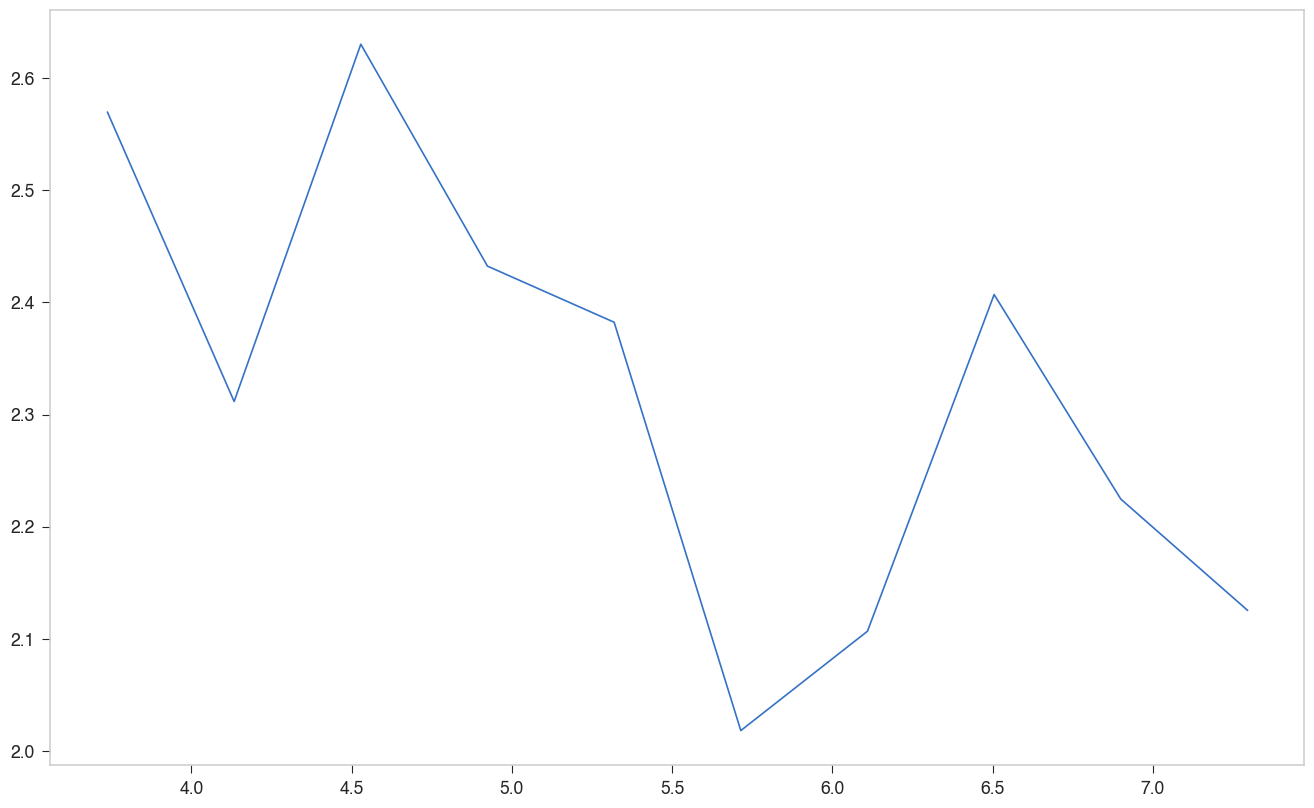

In [134]:
selected_data = data.query("ResName1 == 'ARG' and ResName2 == 'TRP' and r_com_com < 7.5")
hist,bins = np.histogram(selected_data["r_com_com"], bins=10)
bin_centers = (bins[1:] + bins[:-1])/2
y = -np.log((hist+10)/np.sum(hist+10))
plt.plot(bin_centers, y)

In [120]:
np.sum(((hist+10)/np.sum(hist+10)))

0.9999999999999999

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a30dafe80>]],
      dtype=object)

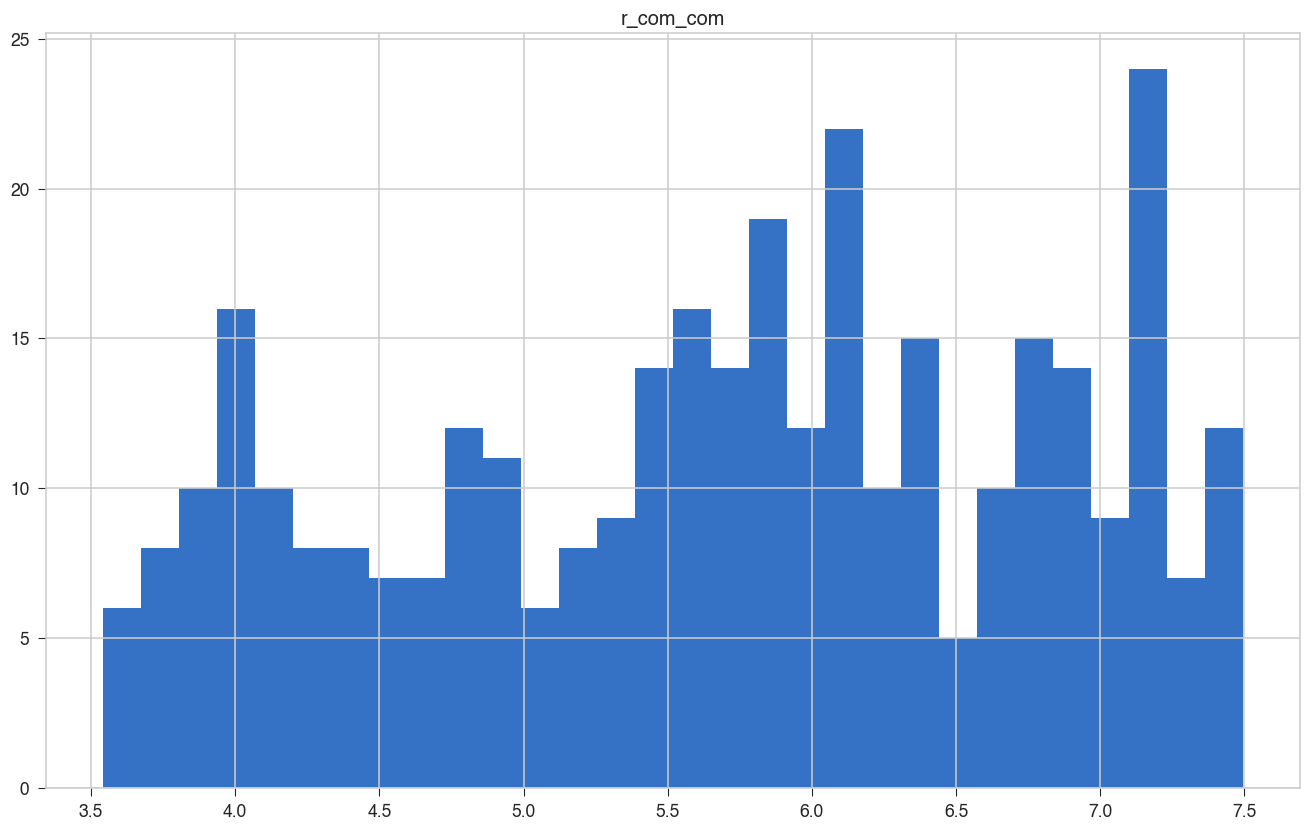

In [112]:
data.query("ResName1 == 'ARG' and ResName2 == 'TRP' and r_com_com < 7.5").hist("r_com_com", bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a31476908>]],
      dtype=object)

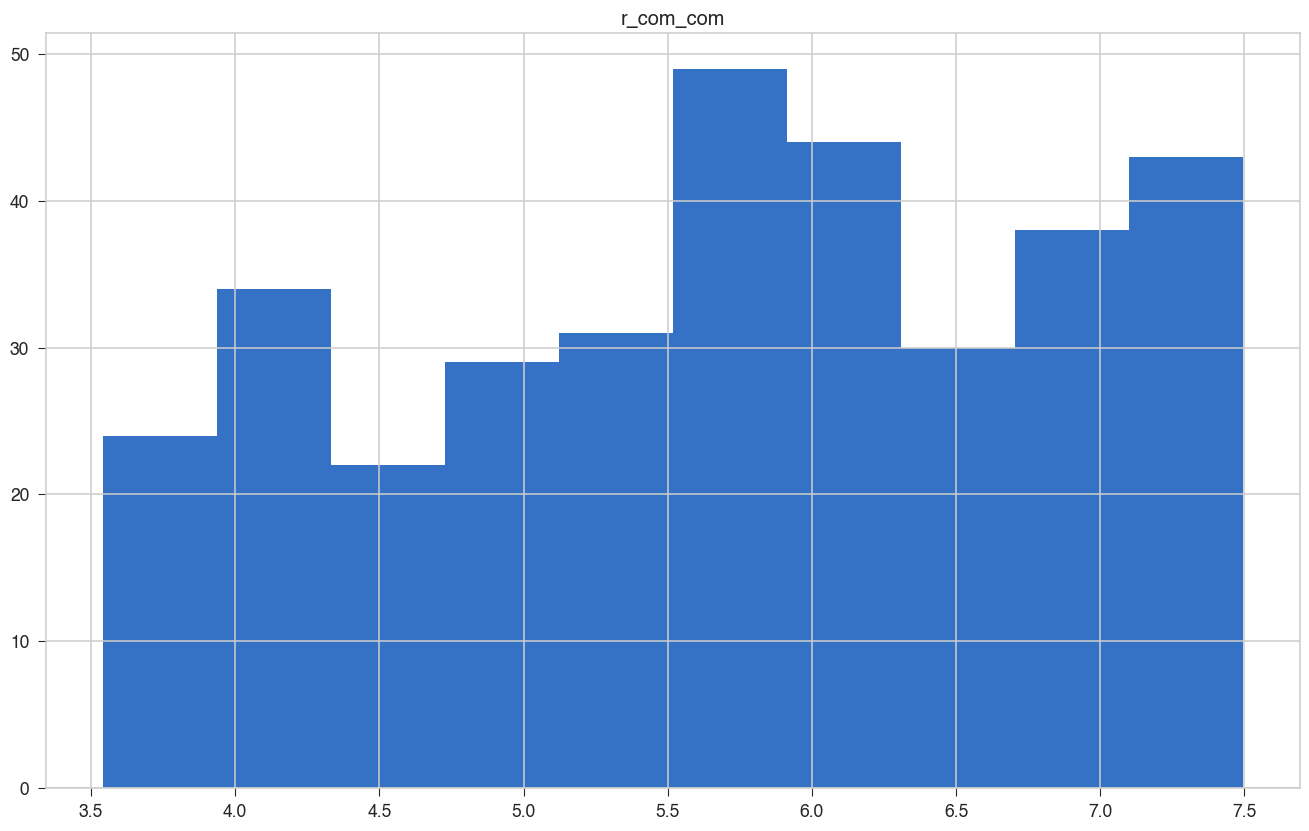

In [111]:
data.query("ResName1 == 'ARG' and ResName2 == 'TRP' and r_com_com < 7.5").hist("r_com_com", bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a37505b70>]],
      dtype=object)

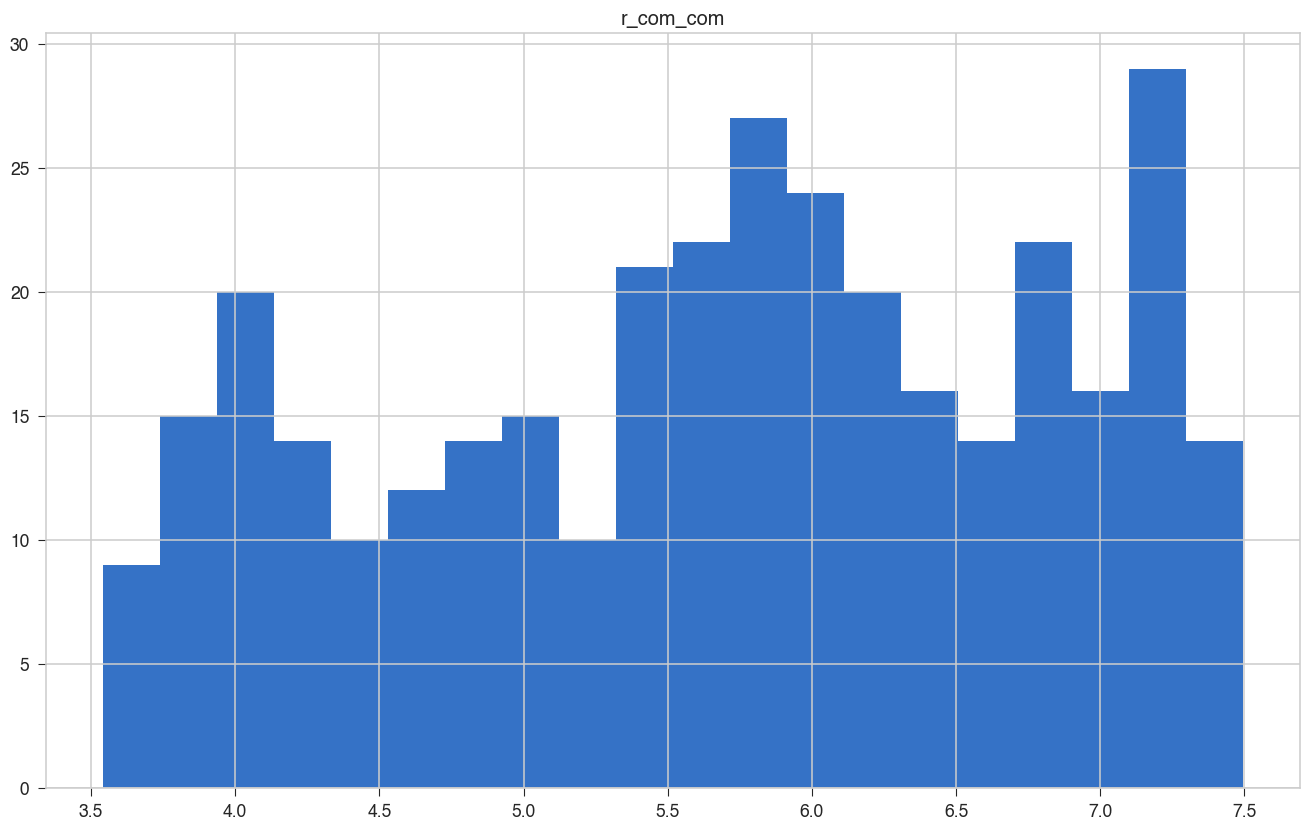

In [113]:
data.query("ResName1 == 'ARG' and ResName2 == 'TRP' and r_com_com < 7.5").hist("r_com_com", bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a33509240>]],
      dtype=object)

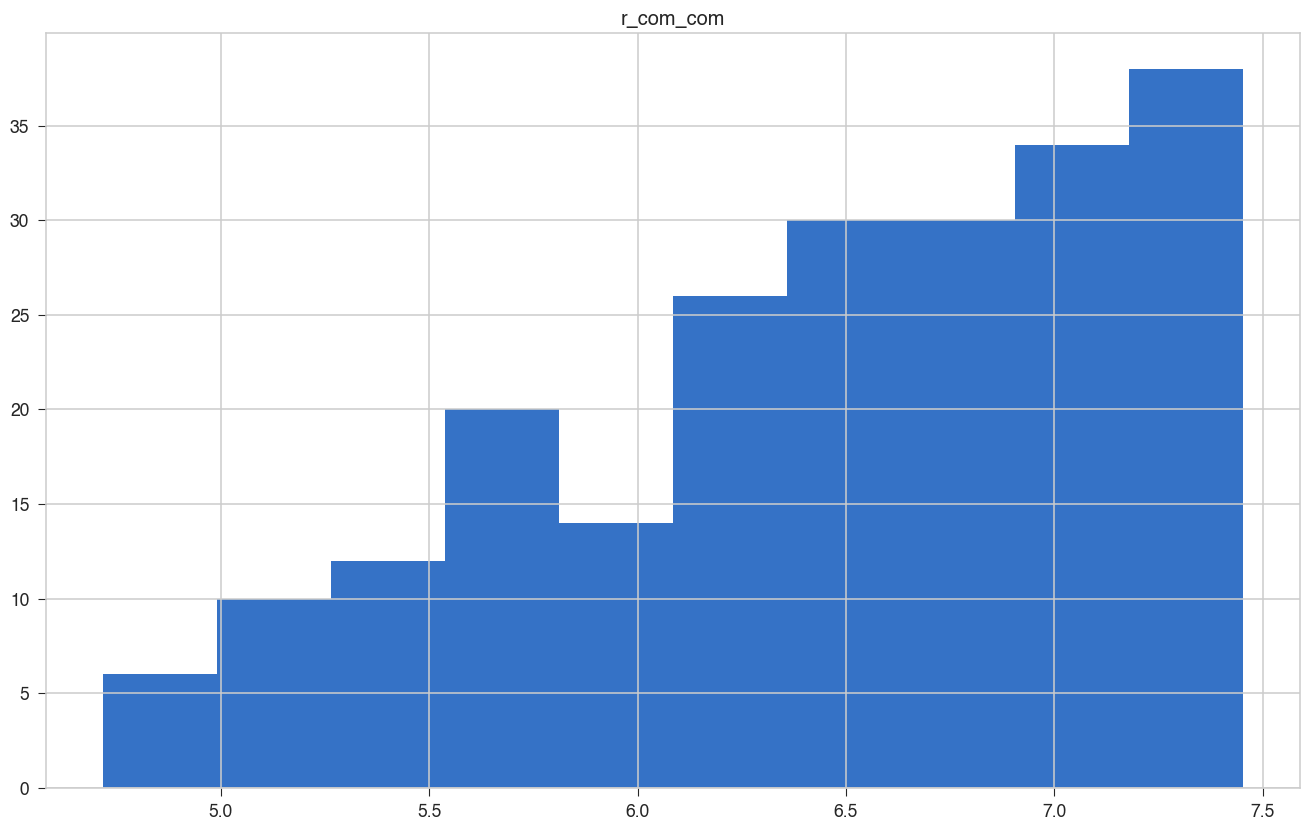

In [105]:
data.query("ResName1 == 'TRP' and ResName2 == 'TRP' and r_com_com < 7.5").hist("r_com_com", bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b62a630>]],
      dtype=object)

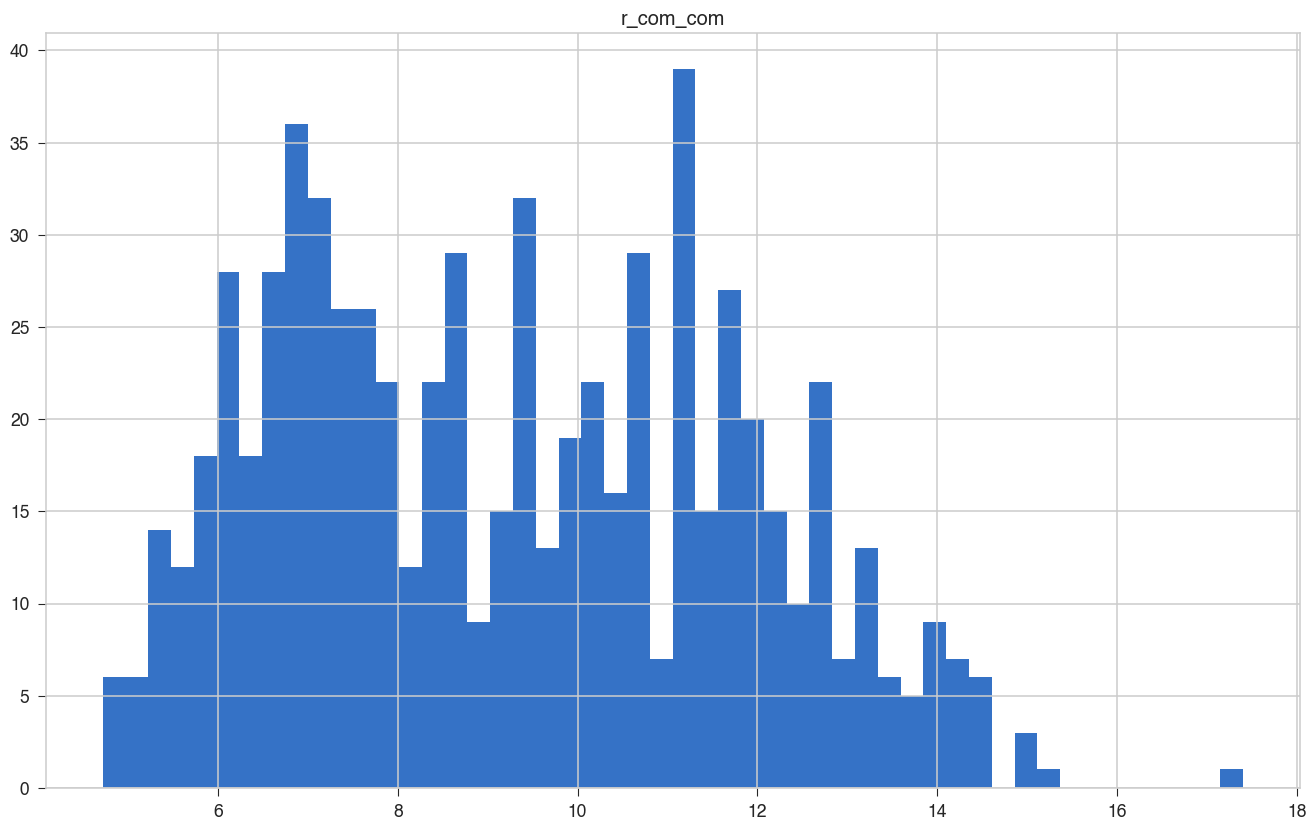

In [13]:
data.query("ResName1 == 'TRP' and ResName2 == 'TRP'").hist("r_com_com", bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c6b2048>]],
      dtype=object)

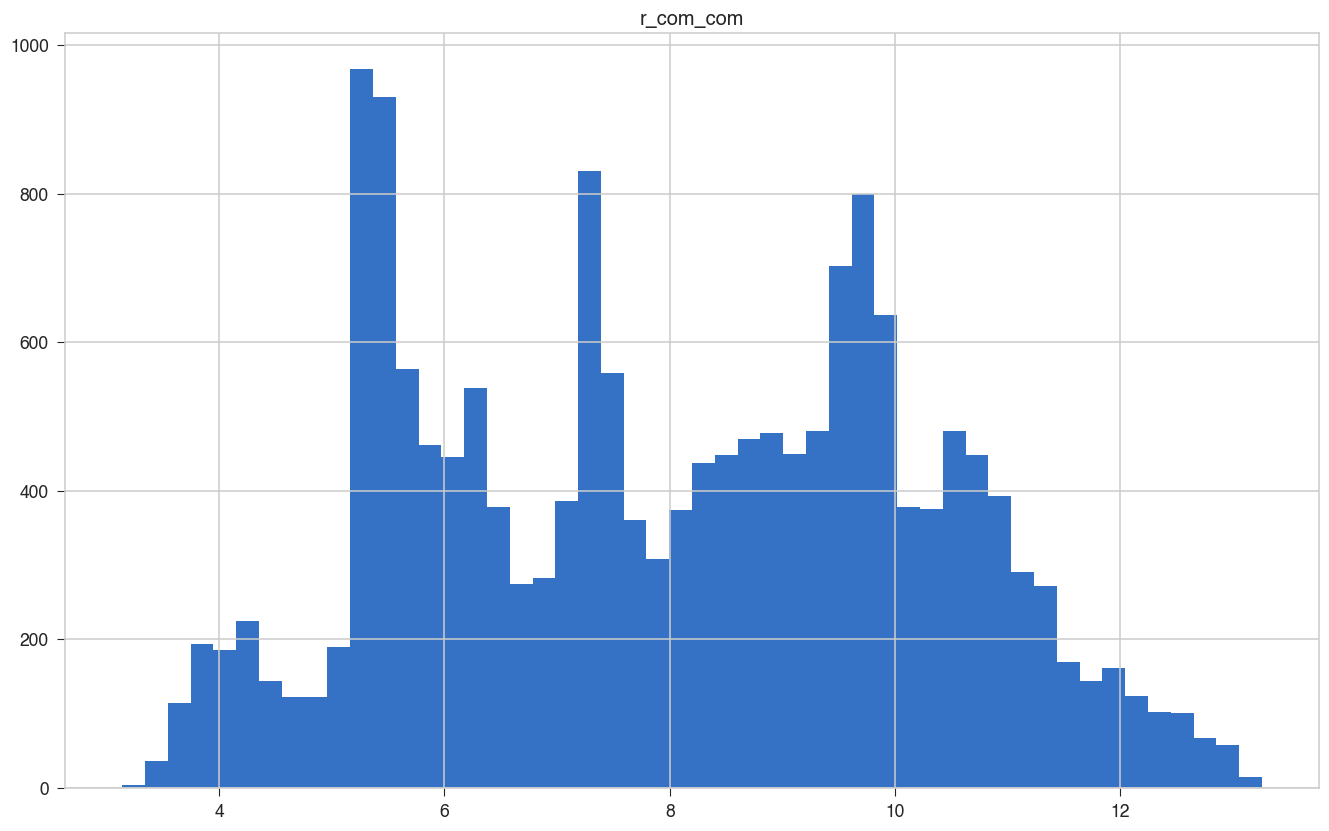

In [20]:
data.query("ResName1 == 'ALA' and ResName2 == 'ALA'").hist("r_com_com", bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a5ed7b8>]],
      dtype=object)

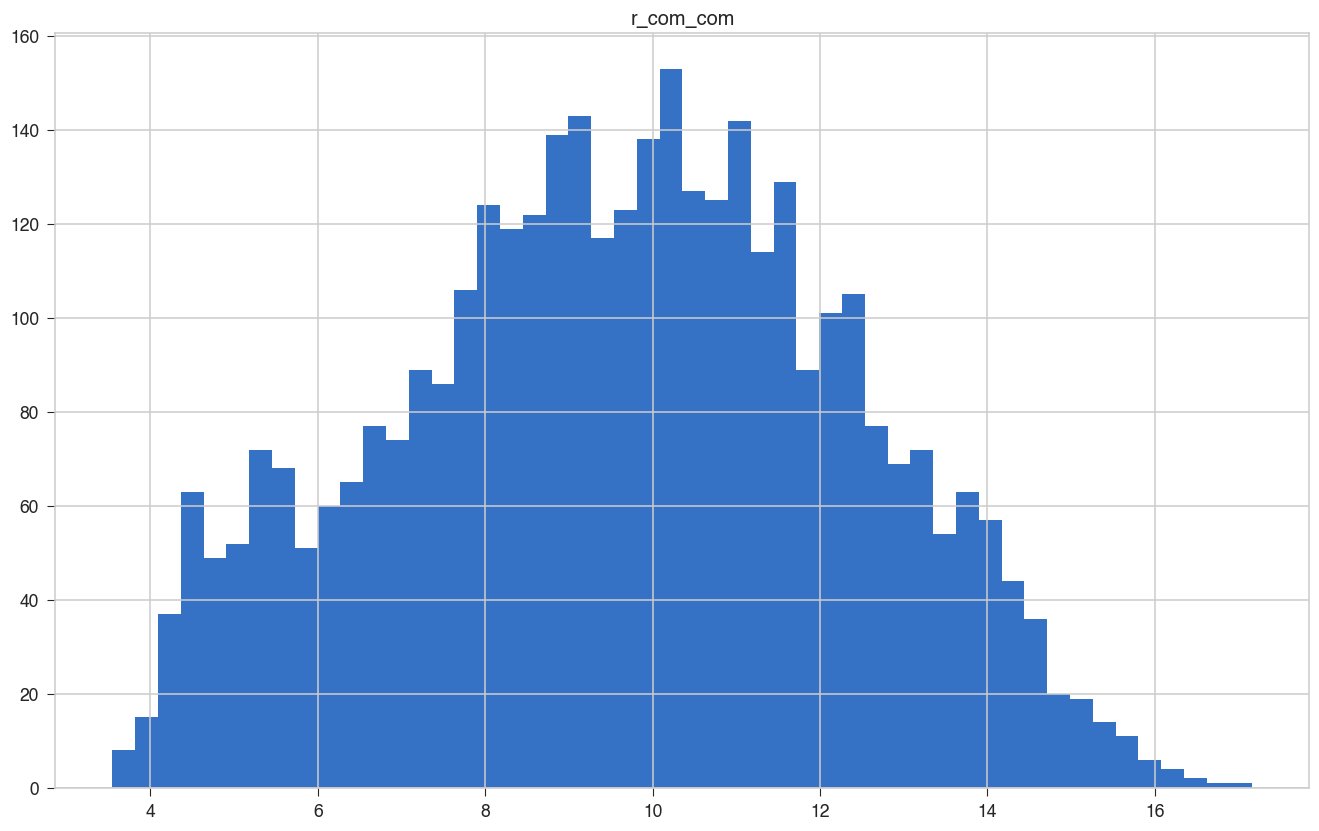

In [30]:
data.query("ResName1 == 'ASN' and ResName2 == 'ARG'").hist("r_com_com", bins=50)

In [32]:
data.query("ResName1 == 'ASN' and ResName2 == 'ARG'").sort_values("r_com_com").head(2)

,Protein,id1,ResName1,id2,ResName2,r_ca_ca,r_com_com,r_cb_cb,r_ca_com,r_com_ca
1314561,3bhqA00,71,ASN,135,ARG,7.013448,3.546138,4.845044,4.698705,4.677932
221056,1y0uA00,28,ASN,31,ARG,5.293830,3.603272,4.065062,4.884607,4.692377


In [33]:
data.query("ResName1 == 'ARG' and ResName2 == 'ASN'").sort_values("r_com_com").head(2)

,Protein,id1,ResName1,id2,ResName2,r_ca_ca,r_com_com,r_cb_cb,r_ca_com,r_com_ca
1315840,3bhqA00,135,ARG,71,ASN,7.013448,3.546138,4.845044,4.677932,4.698705
221106,1y0uA00,31,ARG,28,ASN,5.293830,3.603272,4.065062,4.692377,4.884607


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26f7de48>]],
      dtype=object)

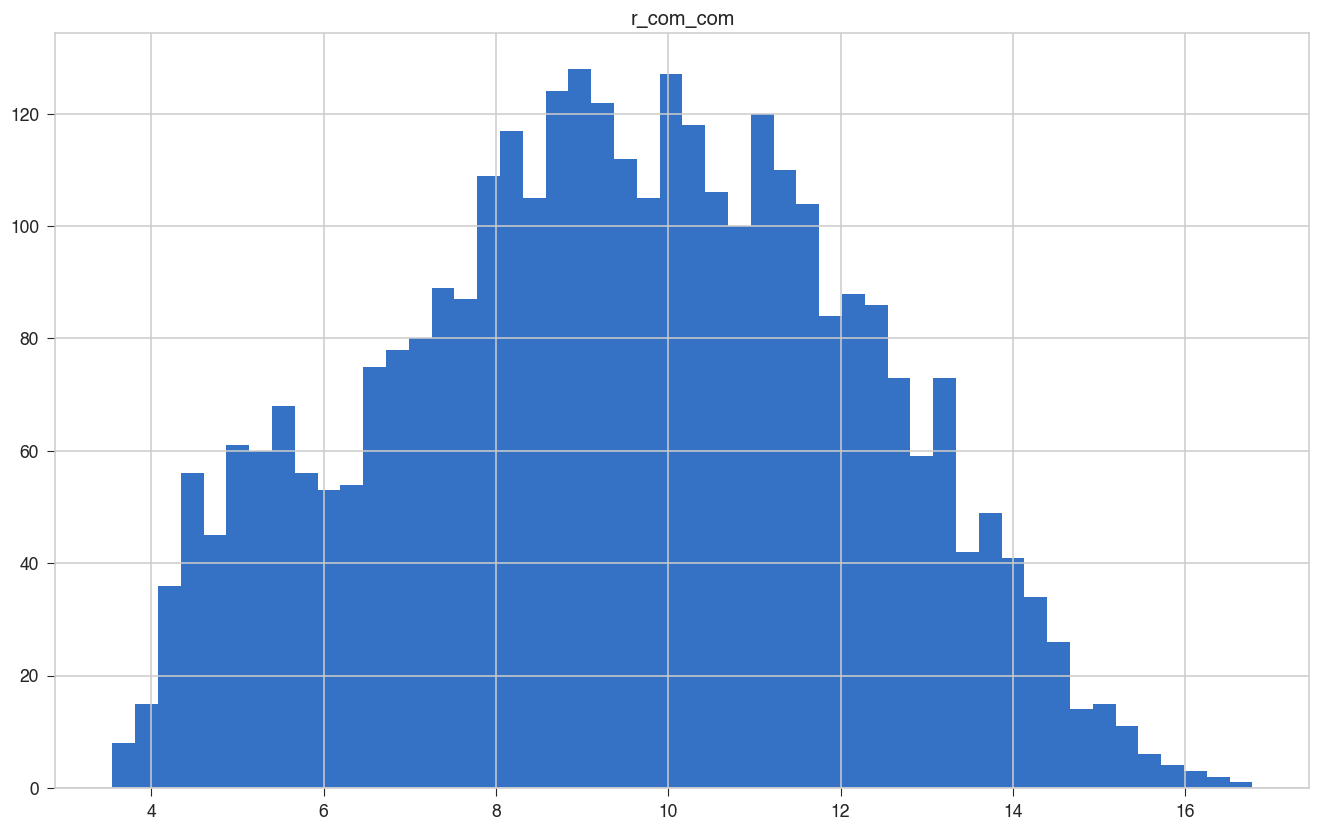

In [29]:
data.query("ResName1 == 'ARG' and ResName2 == 'ASN'").hist("r_com_com", bins=50)

In [39]:
import plotly.express as px
res = "PHE"
data_res = data.query(f"ResName1 == '{res}' and ResName2 == '{res}' and r_com_com < 7.5").reset_index(drop=True)
print(res, data_res.shape)
fig = px.scatter_3d(data_res, x='r_ca_ca', y='r_com_com', z='r_ca_com', opacity=0.1)
fig.show()

PHE (2182, 10)


In [40]:
import plotly.express as px
res = "PHE"
data_res = data.query(f"ResName1 == '{res}' and ResName2 == '{res}'").reset_index(drop=True)
print(res, data_res.shape)
fig = px.scatter_3d(data_res, x='r_ca_ca', y='r_com_com', z='r_ca_com', opacity=0.1)
fig.show()

PHE (5160, 10)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c982048>]],
      dtype=object)

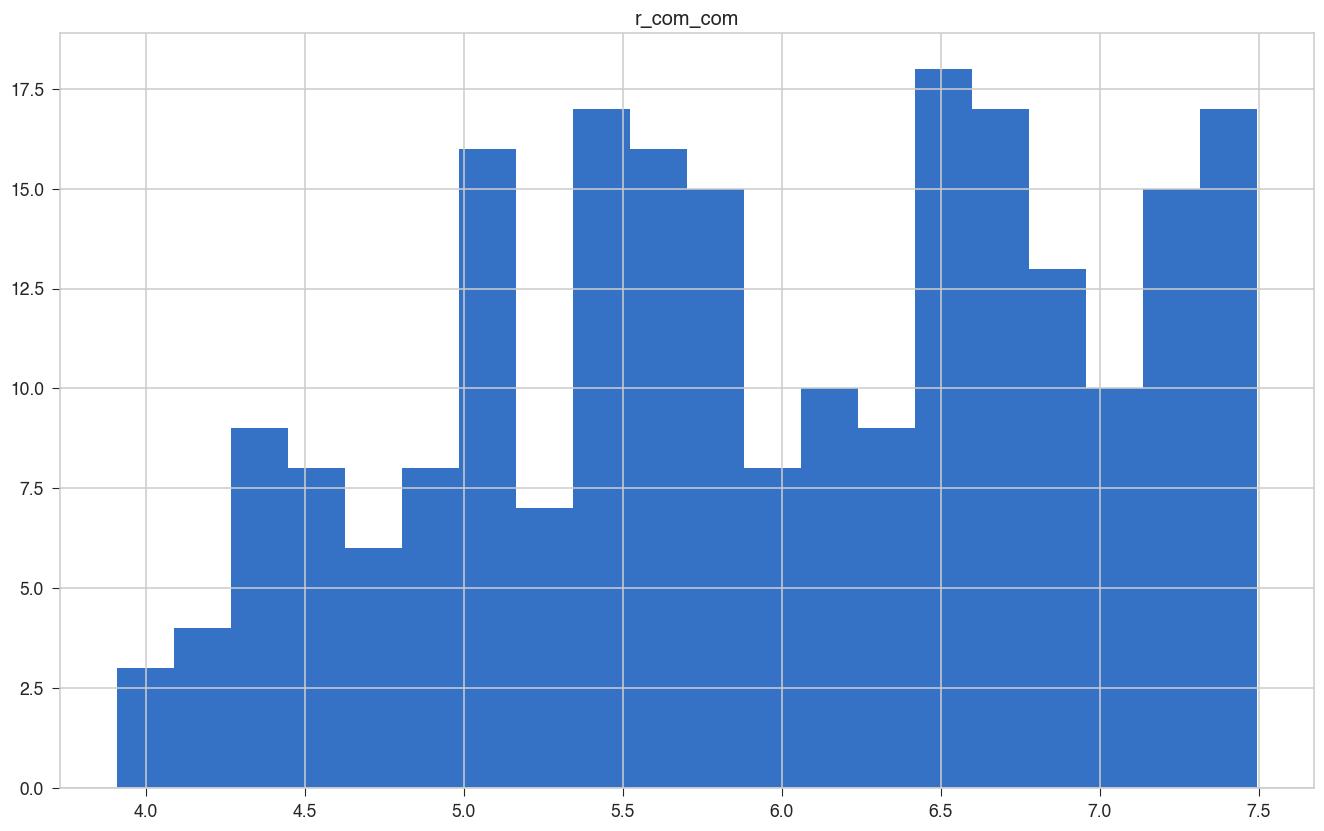

In [62]:
data_res = data.query("ResName1 == 'ARG' and ResName2 == 'MET' and r_com_com < 7.5")
data_res_filtered = data_res.query("abs(id1-id2)<12")
data_res_filtered.hist("r_com_com", bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3789b2e8>]],
      dtype=object)

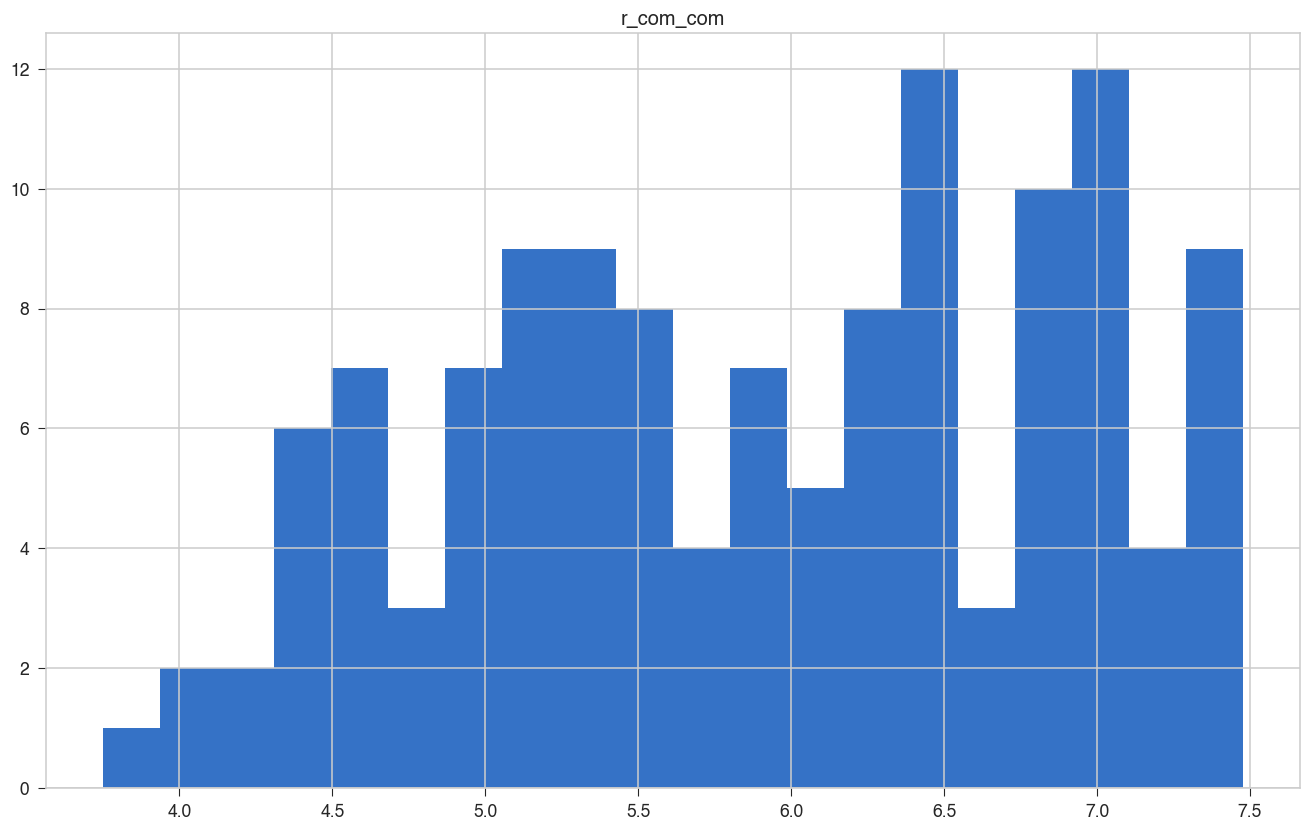

In [61]:
data_res = data.query("ResName1 == 'ARG' and ResName2 == 'MET' and r_com_com < 7.5")
data_res_filtered = data_res.query("abs(id1-id2)>12")
data_res_filtered.hist("r_com_com", bins=20)

In [53]:
res = "ARG"
data_res = data.query(f"ResName1 == '{res}' and ResName2 == '{res}'").reset_index(drop=True)

In [51]:
data_res.dtypes

Protein       object
id1            int64
ResName1      object
id2            int64
ResName2      object
r_ca_ca      float64
r_com_com    float64
r_cb_cb      float64
r_ca_com     float64
r_com_ca     float64
dtype: object

In [55]:
data_res.query("r_com_com > 7 and r_com_com < 8")

,Protein,id1,ResName1,id2,ResName2,r_ca_ca,r_com_com,r_cb_cb,r_ca_com,r_com_ca
61,1rr7A02,82,ARG,115,ARG,11.401725,7.965920,10.116141,8.786590,10.752554
71,1rr7A02,115,ARG,82,ARG,11.401725,7.965920,10.116141,10.752554,8.786590
91,1i36A02,218,ARG,219,ARG,3.823408,7.726450,5.429818,6.303528,5.852432
95,1i36A02,219,ARG,218,ARG,3.823408,7.726450,5.429818,5.852432,6.303528
120,2g7lA00,43,ARG,44,ARG,3.859255,7.186208,5.491639,7.871461,4.423999
121,2g7lA00,44,ARG,43,ARG,3.859255,7.186208,5.491639,4.423999,7.871461
143,4uasA02,22,ARG,81,ARG,9.012647,7.772874,8.299223,7.919721,8.976596
155,4uasA02,54,ARG,57,ARG,5.103925,7.707703,5.757870,6.161800,8.659234
156,4uasA02,57,ARG,60,ARG,5.325678,7.061013,5.920855,3.750400,8.826361
157,4uasA02,57,ARG,54,ARG,5.103925,7.707703,5.757870,8.659234,6.161800


TRP (220, 12)


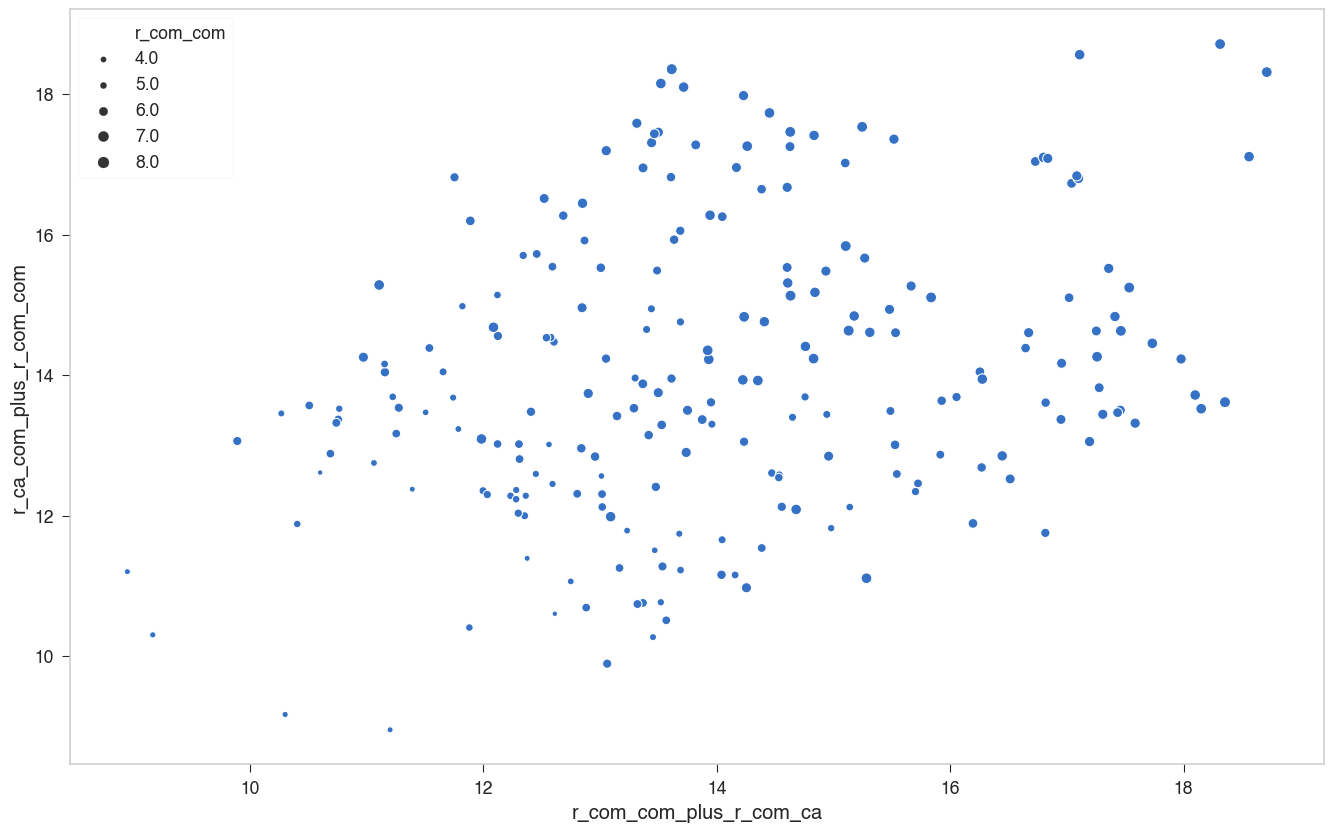

In [46]:
import plotly.express as px
res = "TRP"
data_res = data.query(f"ResName1 == '{res}' and ResName2 == '{res}' and r_com_com < 7.5").reset_index(drop=True)
data_res["r_com_com_plus_r_com_ca"] = data_res["r_com_com"] + data_res["r_com_ca"]
data_res["r_ca_com_plus_r_com_com"] = data_res["r_ca_com"] + data_res["r_com_com"]
print(res, data_res.shape)
# fig = px.scatter_3d(data_res, x='r_com_com_plus_r_com_ca', y='r_ca_com_plus_r_com_com', z='r_ca_com', opacity=0.1)
# fig.show()
sns.scatterplot("r_com_com_plus_r_com_ca", "r_ca_com_plus_r_com_com", size="r_com_com", data=data_res, )

In [41]:
import plotly.express as px
res = "TRP"
data_res = data.query(f"ResName1 == '{res}' and ResName2 == '{res}'").reset_index(drop=True)
print(res, data_res.shape)
fig = px.scatter_3d(data_res, x='r_ca_ca', y='r_com_com', z='r_ca_com', opacity=0.1)
fig.show()

TRP (703, 10)


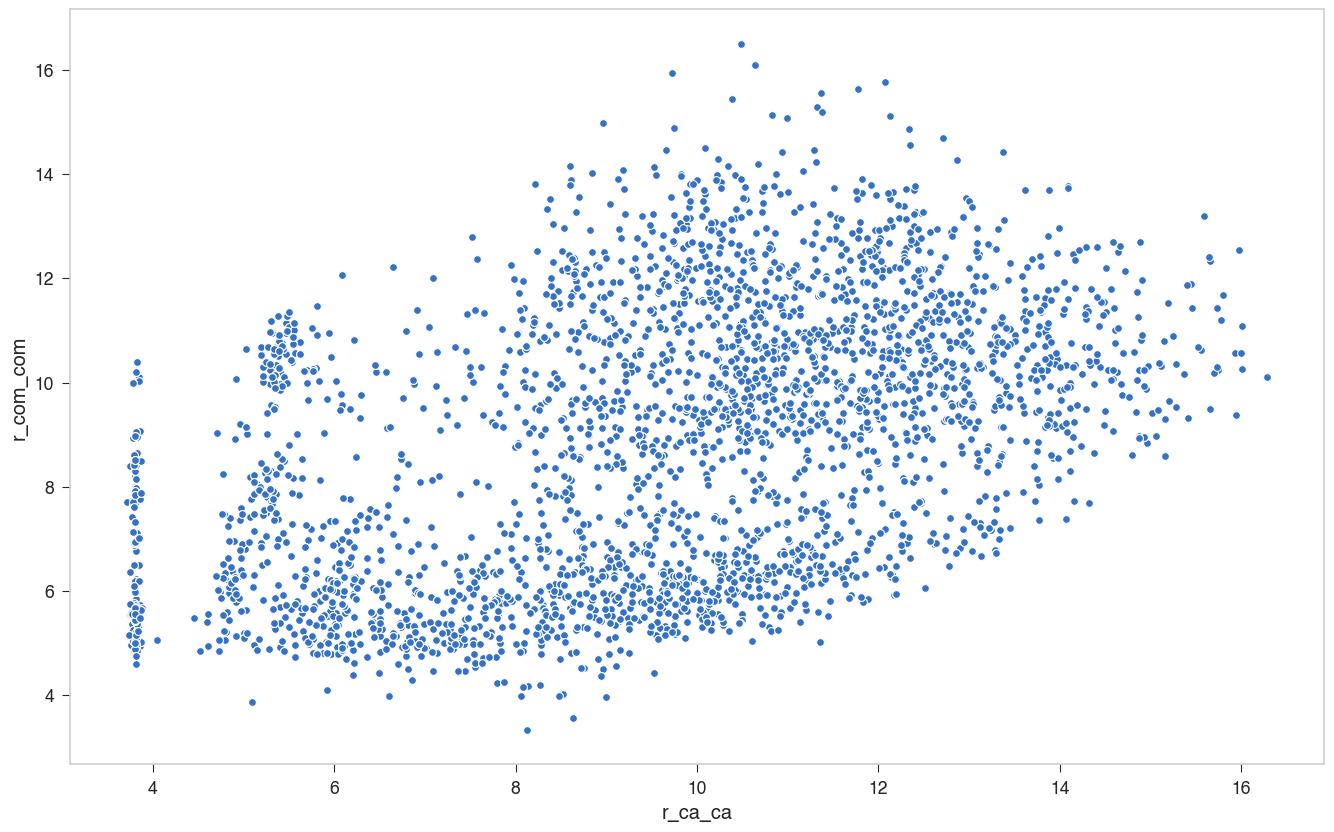

In [34]:
data_res = data.query("ResName1 == 'PHE' and ResName2 == 'PHE'").reset_index(drop=True)
sns.scatterplot("r_ca_ca", "r_com_com", data=data_res, )

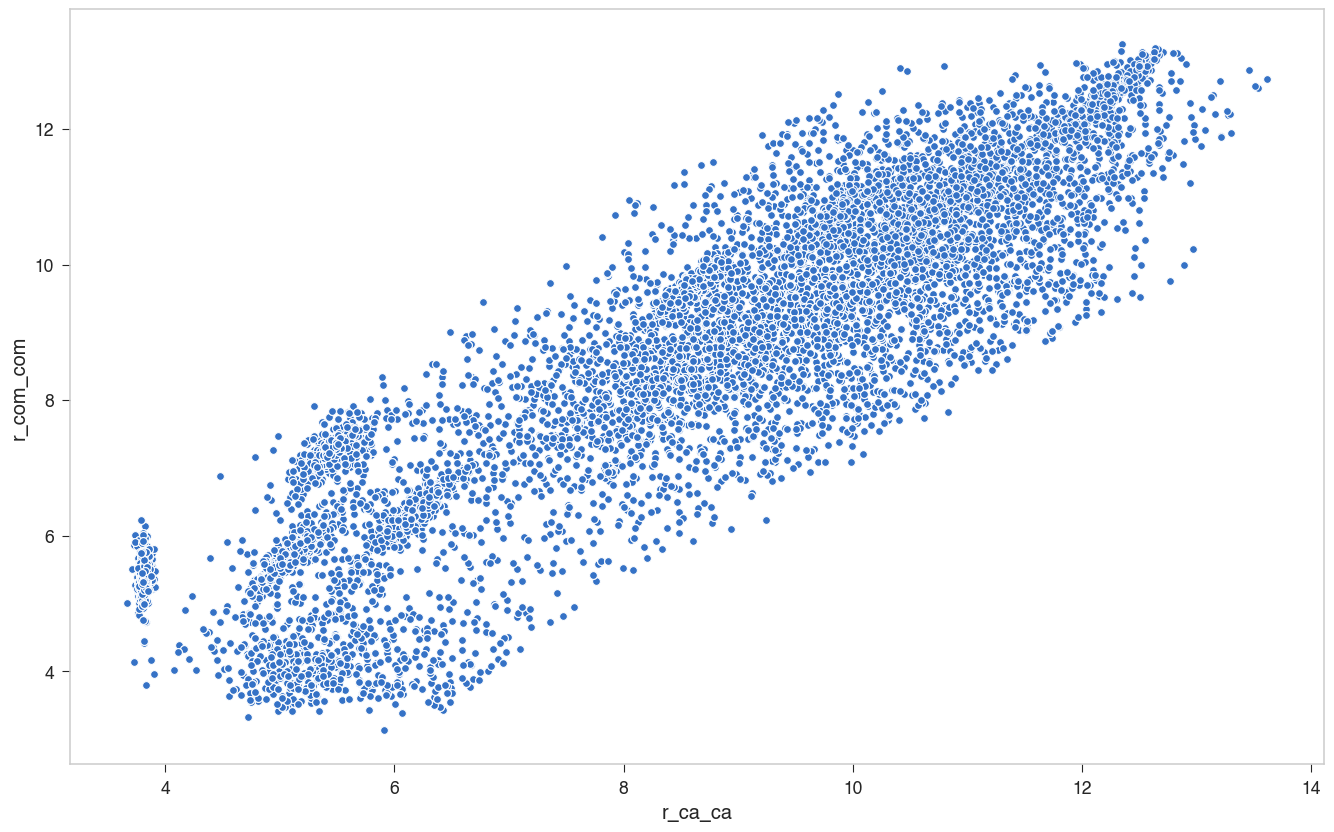

In [22]:
data_res = data.query("ResName1 == 'ALA' and ResName2 == 'ALA'").reset_index(drop=True)
sns.scatterplot("r_ca_ca", "r_com_com", data=data_res, )

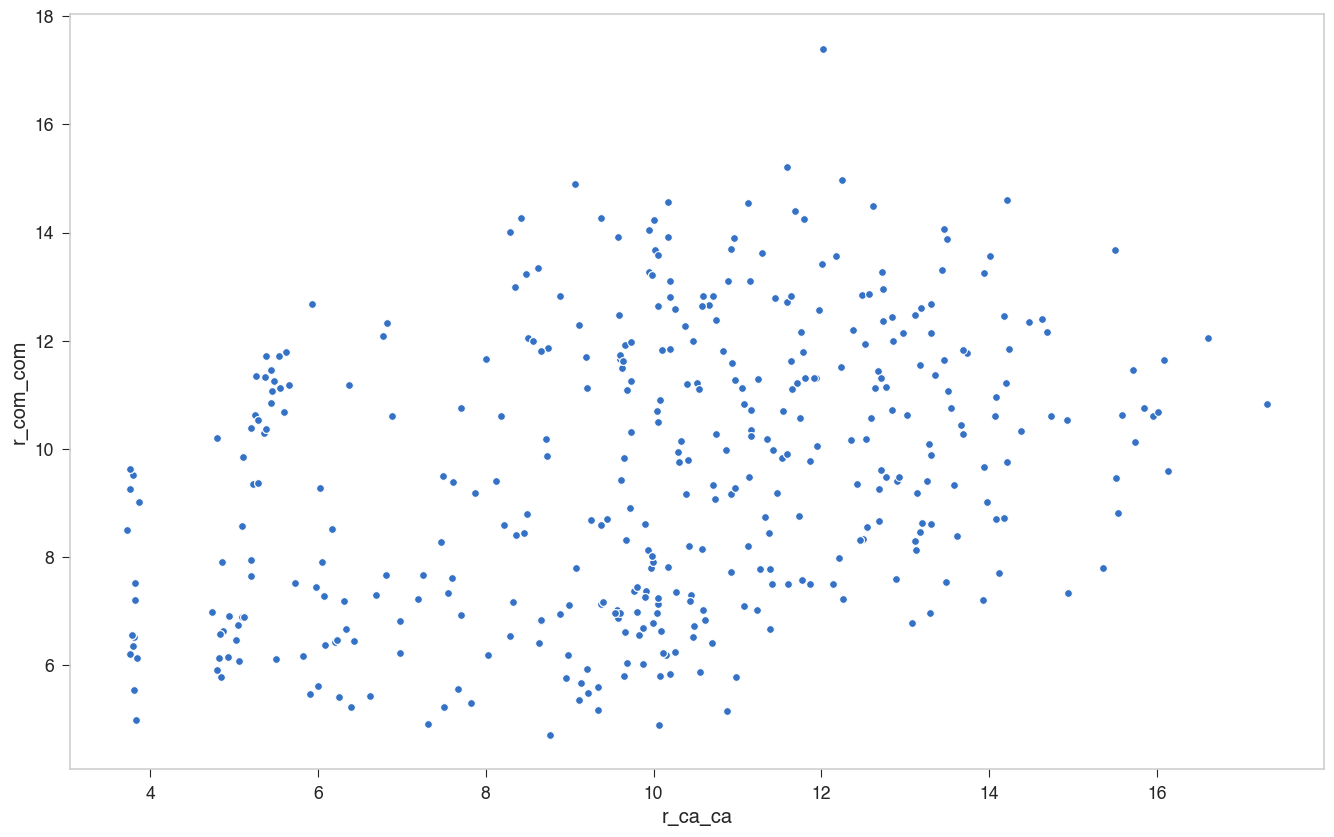

In [23]:
data_res = data.query("ResName1 == 'TRP' and ResName2 == 'TRP'").reset_index(drop=True)
sns.scatterplot("r_ca_ca", "r_com_com", data=data_res, )

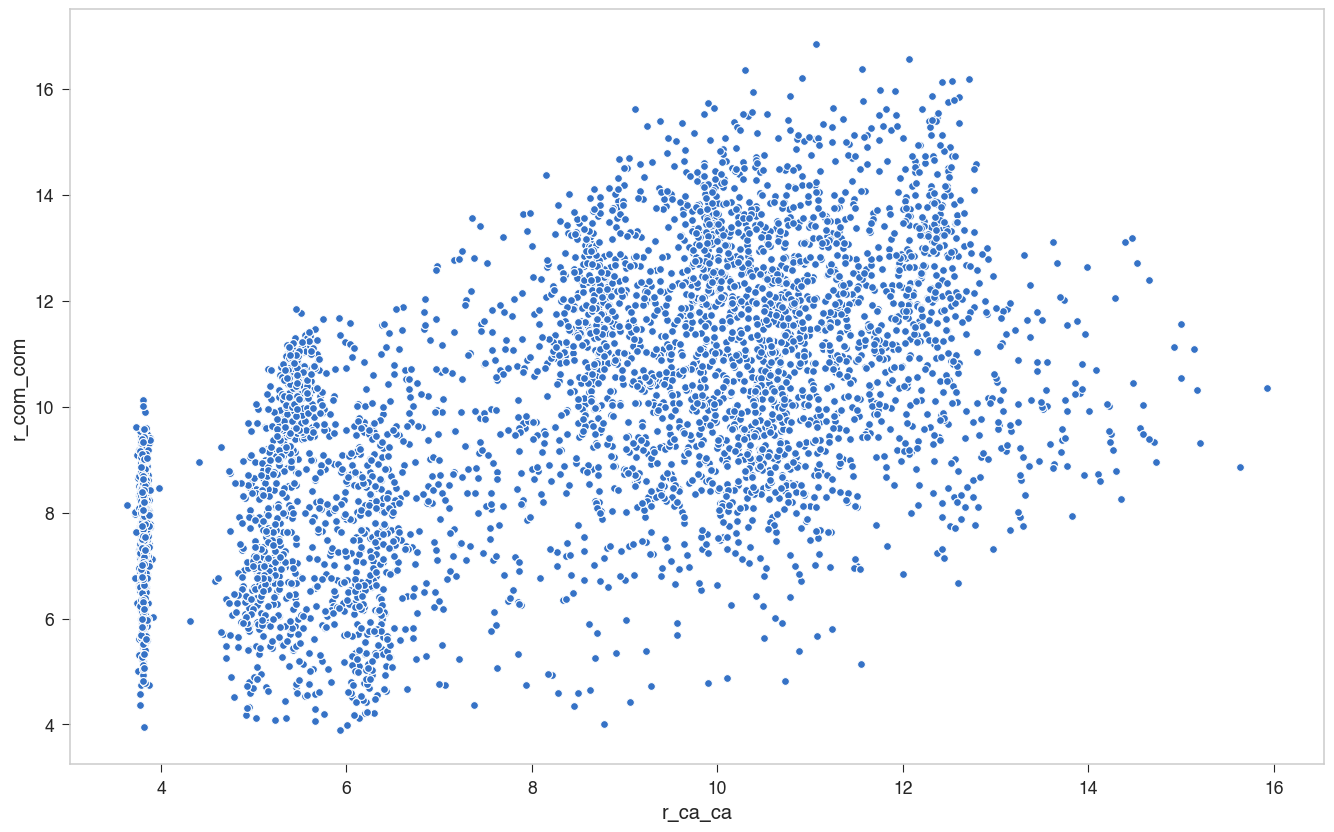

In [24]:
data_res = data.query("ResName1 == 'GLU' and ResName2 == 'GLU'").reset_index(drop=True)
sns.scatterplot("r_ca_ca", "r_com_com", data=data_res, )

In [10]:
selected.sort_values("r_com_com")

,Protein,id1,ResName1,id2,ResName2,r_ca_ca,r_com_com,r_cb_cb,r_ca_com,r_com_ca
80,5ghkA01,90,CYS,101,CYS,5.401658,2.062641,3.647413,3.221539,3.713083
129,1vx4K02,124,GLU,128,THR,4.376815,2.544600,2.075428,2.581292,4.145525
291,1vx4K02,128,THR,124,GLU,4.376815,2.544600,2.075428,4.145525,2.581292
200,1vx4K02,94,LYS,96,LYS,3.893709,2.620520,3.417238,3.268701,4.924048
67,2efwG00,120,ASP,116,LYS,5.544206,2.898653,5.155882,5.334033,4.437231
193,2efwG00,116,LYS,120,ASP,5.544206,2.898653,5.155882,4.437231,5.334033
251,3dv9A02,102,PRO,101,CYS,3.810050,2.910863,4.765211,4.034386,3.855889
89,3dv9A02,101,CYS,102,PRO,3.810050,2.910863,4.765211,3.855889,4.034386
33,1guxB00,775,ARG,773,SER,5.505802,2.941009,4.772800,4.355688,4.886553
267,1guxB00,773,SER,775,ARG,5.505802,2.941009,4.772800,4.886553,4.355688
